# **Import Libraries**

In [ ]:
!pip install gdown==4.6.0
!pip install salesforce-lavis
!pip install sentence-transformers
!pip install googletrans==4.0.0-rc1

ERROR: Invalid requirement: '='
Hint: = is not a valid operator. Did you mean == ?
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 31.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.26.1
    Uninstalling transformers-4.26.1:
      Successfully uninstalled transformers-4.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
salesforce-lavis 1.0.2 requires transformers<4.27,>=4.25.0, but you have transformers 4.37.2 which is incompatible.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:0

In [ ]:
!gdown 1zqajUBmBI5C8yaxu4BIboXQnFf02k5Os
!gdown 1s5PqaJvd9WmsTywR6zvPnMi6mw_5tFYd

Downloading...
From: https://drive.google.com/uc?id=1zqajUBmBI5C8yaxu4BIboXQnFf02k5Os
To: /content/translate_phrase_it_en.txt
100% 10.2k/10.2k [00:00<00:00, 31.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1s5PqaJvd9WmsTywR6zvPnMi6mw_5tFYd
To: /content/translate_phrase_fa_en.txt
100% 6.90k/6.90k [00:00<00:00, 19.3MB/s]


In [ ]:
#os utils
import os
import requests
import tarfile
import zipfile
import gzip
from itertools import chain
from os.path import join as path_join
import os.path
import shutil
import time
import gdown

#debugging
import logging
from typing import List, Dict
from tqdm import tqdm

#np, pd, torch
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split

#CLIP, BLIP
from sentence_transformers import SentenceTransformer, util #For clip multilingual
from transformers import CLIPProcessor, CLIPModel
from lavis.models import load_model_and_preprocess

#data manipulation
import pandas as pd
from statistics import mean

#plots
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg



In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#test resized and text

url_image = 'https://github.com/asahi417/visual-wsd-baseline/releases/download/dataset-test/test_images_resized.zip'
url_label = "https://github.com/asahi417/visual-wsd-baseline/releases/download/dataset-test/test.data.v1.1.zip"

folder_images = 'test-images'
folder_texts = 'test-texts'

zip_name_image = 'test_images_resized.zip'
zip_name_text = 'test.data.v1.1.gold.zip'

In [ ]:
# url = 'https://drive.google.com/uc?id=1MpGwcVcRJ24-4al10rmerY81lAIjpc7a'
# gdown.download(url, zip_name_text, quiet=False)

In [ ]:
# downloaded = True
# attempts = 0

# while downloaded:
#   downloaded = False
#   attempts += 1



#   try:
#     url = 'https://drive.google.com/uc?id=1MpGwcVcRJ24-4al10rmerY81lAIjpc7a'
#     gdown.download(url, zip_name_text, quiet=False)
#   except:
#     print('in except')
#     downloaded = True

#   time.sleep(2)

# print(f'downloaded after: {attempts} attempts')

# **Download dataset**

In [ ]:
def save_predictions(preds, filename):
  f = open(filename, 'w', encoding = 'utf-8')
  for pred in preds:
    f.write(pred + "\n")
  f.close()
  return


In [ ]:
def download_dataset(url, folder_name, zip_name):

  #Aggiungere check folder già esiste
  if os.path.exists(folder_name):
    shutil.rmtree(folder_name)
  os.makedirs(folder_name)
  path = path_join(folder_name, zip_name)

  #Download file from url
  f = open(path, "wb")
  r = requests.get(url)
  f.write(r.content)

  #Unzip data
  if zip_name.endswith('.tar'):
    tar = tarfile.open(path)
    tar.extractall(folder_name)
    tar.close()
    # os.remove(path)
  if zip_name.endswith('.tar.gz') or zip_name.endswith('.tgz'):
    tar = tarfile.open(path, "r:gz")
    tar.extractall(folder_name)
    tar.close()
    # os.remove(path)
  elif path.endswith('.zip'):
    zip_ref = zipfile.ZipFile(path, 'r')
    zip_ref.extractall(folder_name)
    zip_ref.close()
    # os.remove(path)
  elif path.endswith('.gz'):
    gzip_ref = gzip.open(path, 'rb')
    f_write = open(path.replace('.gz', ''), 'wb')
    f_write.write(gzip_ref.read())
    f_write.close()
    gzip_ref.close()
    # os.remove(path)

In [ ]:
def load(filenames, dir_image, dir_text):

  file_texts = path_join(dir_text, filenames[0])
  file_gold = path_join(dir_text, filenames[1])

  f_t = open(file_texts)
  f_g = open(file_gold)

  rows = []
  for line in f_t.readlines():
    rows.append(line.strip().split('\t'))
  f_t.close()

  golds = []
  for line in f_g.readlines():
    golds.append(line.strip().split('\t')[0])
  f_g.close()

  data = []
  golden_keys = []
  for idx, row in enumerate(rows):
    target_word = row[0]
    target_phrase = row[1]
    candidate_images = [path_join(dir_image, y) for y in row[2:]]
    gold_image = path_join(dir_image, golds[idx])

    data.append({
        'target_word': target_word,
        'target_phrase': target_phrase,
        'candidate_images': candidate_images,
        'gold_image': gold_image,
    })

    golden_keys.append(golds[idx])

  return data, golden_keys

def data_loader(dir_image, dir_text):
  data={}
  golden_keys = {}

  for filenames in [("en.test.data.v1.1.txt", "en.test.gold.v1.1.txt"), ("fa.test.data.txt", "fa.test.gold.txt"), ("it.test.data.v1.1.txt", "it.test.gold.v1.1.txt")]:
    lang = filenames[0].split('.')[0]
    tmp_data, golds = load(filenames, dir_image, dir_text)

    data[lang] = tmp_data
    golden_keys[lang] = golds

  return data, golden_keys

In [ ]:
#download the golden and test texts
f = open(zip_name_text, "wb")
r = requests.get('https://drive.google.com/uc?id=1MpGwcVcRJ24-4al10rmerY81lAIjpc7a')
f.write(r.content)

36754

In [ ]:
# download_dataset(url_label, folder_texts, zip_name_text)
download_dataset(url_image, folder_images, zip_name_image)

In [ ]:
#unzip images
zip_ref = zipfile.ZipFile(zip_name_text, 'r')
zip_ref.extractall(folder_texts)
zip_ref.close()

In [ ]:
data, golden_keys = data_loader(path_join(folder_images, 'test_images_resized'), folder_texts)
golden_en = golden_keys['en']
data_en = data['en']

golden_it = golden_keys['it']
data_it = data['it']

golden_fa = golden_keys['fa']
data_fa = data['fa']

# **Hyperparameters**

In [ ]:
#hyperparameters
class opt:
    data_dir = '.'
    language = 'en'
    model_clip = None
    output_dir = "result"
    prompt = ['<>', 'This is <>.', 'Example of an image caption that explains <>.']
    input_type = ['target_word', 'target_phrase']
    batch_size = None
    num_images = 10
    base_augmentation = False
    use_wordnet = False
    plot = True
    print_step = 100
    device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [ ]:
def get_accuracy(y_pred, Y_train):
  return np.sum(Y_train == y_pred) / len(Y_train)

# **Wordnet**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#GPT GENERATED

# from nltk.corpus import wordnet

# def get_word_definitions(word):
#     synsets = wordnet.synsets(word)

#     definitions = []
#     for synset in synsets:
#         for lemma in synset.lemmas():
#             if lemma.name() == word:
#                 definitions.append(lemma.synset().definition())

#     return definitions

# # Esempio di utilizzo:
# word_to_search = "python"
# definitions = get_word_definitions(word_to_search)

# if definitions:
#     print(f"Definizioni di '{word_to_search}':")
#     for i, definition in enumerate(definitions, 1):
#         print(f"{i}. {definition}")
# else:
#     print(f"Nessuna definizione trovata per '{word_to_search}'.")


In [ ]:
from nltk.corpus import wordnet

def get_word_definitions(word):
    synsets = wordnet.synsets(word)

    definitions = []
    for synset in synsets:
        for lemma in synset.lemmas():
          if lemma.synset().definition() not in definitions:
            definitions.append(lemma.synset().definition())

    return definitions

# Esempio di utilizzo:
word_to_search = "python"
definitions = get_word_definitions(word_to_search)

if definitions:
    print(f"Definizioni di '{word_to_search}':")
    for i, definition in enumerate(definitions, 1):
        print(f"{i}. {definition}")
else:
    print(f"Nessuna definizione trovata per '{word_to_search}'.")


Definizioni di 'python':
1. large Old World boas
2. a soothsaying spirit or a person who is possessed by such a spirit
3. (Greek mythology) dragon killed by Apollo at Delphi


In [ ]:
synsets = wordnet.synsets('goal')

In [ ]:
synsets

[Synset('goal.n.01'),
 Synset('finish.n.04'),
 Synset('goal.n.03'),
 Synset('goal.n.04')]

In [ ]:
definitions = []
for synset in synsets:
        for lemma in synset.lemmas():
          if lemma.synset().definition() not in definitions:
            definitions.append(lemma.synset().definition())

In [ ]:
definitions

['the state of affairs that a plan is intended to achieve and that (when achieved) terminates behavior intended to achieve it',
 'the place designated as the end (as of a race or journey)',
 'game equipment consisting of the place toward which players of a game try to advance a ball or puck in order to score points',
 'a successful attempt at scoring']

# **CLIP**

## English

In [ ]:
def collate_fn(inputs: Dict, batch_size: int = None):
    size = len(list(inputs.values())[0])
    batch_size = size if batch_size is None or batch_size > size else batch_size
    block = list(range(0, size, batch_size)) + [size] #create un array con step batch_size: [0, batch_size*1, batch_size*2, ...]
    batch_data = []
    for s, e in zip(block[:-1], block[1:]):
        batch_data.append({k: v[s:e] for k, v in inputs.items()}) # create an array with all the batches
    return batch_data

In [ ]:
class CLIP:
    def __init__(self, model, processor, config):

        self.model = model
        self.processor = processor
        self.config = config

        self.device = 'cuda' if torch.cuda.device_count() > 0 else 'cpu'

        self.model.to(self.device)
        self.cos = torch.nn.CosineSimilarity(dim=2, eps=1e-6)

    def get_similarity(self, images: List or str, texts: List or str, batch_size: int = None):
        self.model.eval()

        images = [images] if type(images) is str else images
        texts = [texts] if type(texts) is str else texts

        # print(f'texts: {texts}, images: {images}')



        #image_inputs is an object with a 'pixel_values' tensor property with shape: size(10) X channels X width X height
        #also image_inputs.values is valid to get 'pixel_values'
        logging.debug(f'model inference on images: {len(images)}')
        pil_images = [Image.open(i).convert("RGB") for i in images]
        image_inputs = self.processor(images=pil_images, return_tensors="pt", padding=True) # embed the images into: batch X channels X 336 X 366 (specified by the model pretrained imported) (e.g 'openai/clip-vit-large-patch14-336')
        batch_image_inputs = self.collate_fn(image_inputs, batch_size=batch_size)
        # print(pil_images)
        # print(image_inputs['pixel_values'].shape)
        # print(image_inputs.keys())

        with torch.no_grad():
            output_image_embedding = []
            for i in batch_image_inputs:
                output_image_embedding.append(
                    self.model.get_image_features(**{k: v.to(self.device) for k, v in i.items()}) # embed the images into: batch X 768 (create an embedding for the images)
                )
            output_image_embedding = torch.cat(output_image_embedding)


        logging.debug(f'model inference on texts: {len(texts)}')
        text_inputs = self.processor(text=texts, return_tensors="pt", padding=True)
        batch_text_inputs = self.collate_fn(text_inputs, batch_size=batch_size)

        with torch.no_grad():
            output_text_embedding = []
            for i in batch_text_inputs:
                output_text_embedding.append(
                    self.model.get_text_features(**{k: v.to(self.device) for k, v in i.items()}) # embed the texts into: batch X 768 (create an embedding for the texts)
                )
        output_text_embedding = torch.cat(output_text_embedding)
        logging.debug('compute similarity')

        sim = self.cos(
            output_image_embedding.unsqueeze(1).repeat((1, len(output_text_embedding), 1)),
            output_text_embedding.unsqueeze(0).repeat((len(output_image_embedding), 1, 1))
        ) * 100  # image size x text size
        return sim.cpu().numpy().T

    def collate_fn(self, inputs: Dict, batch_size: int = None):
      size = len(list(inputs.values())[0])
      batch_size = size if batch_size is None or batch_size > size else batch_size
      block = list(range(0, size, batch_size)) + [size] #create un array con step batch_size: [0, batch_size*1, batch_size*2, ...]
      batch_data = []
      for s, e in zip(block[:-1], block[1:]):
          batch_data.append({k: v[s:e] for k, v in inputs.items()}) # create an array with all the batches
      return batch_data

In [ ]:
# model = CLIPModel.from_pretrained('openai/clip-vit-large-patch14-336')
# processor = CLIPProcessor.from_pretrained('openai/clip-vit-large-patch14-336')

# model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
# processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

# model = CLIPModel.from_pretrained('laion/CLIP-ViT-H-14-laion2B-s32B-b79K')
# processor = CLIPProcessor.from_pretrained('laion/CLIP-ViT-H-14-laion2B-s32B-b79K')

# model = CLIPModel.from_pretrained('laion/CLIP-ViT-L-14-laion2B-s32B-b82K')
# processor = CLIPProcessor.from_pretrained('laion/CLIP-ViT-L-14-laion2B-s32B-b82K')

model = CLIPModel.from_pretrained('laion/CLIP-ViT-g-14-laion2B-s12B-b42K')
processor = CLIPProcessor.from_pretrained('laion/CLIP-ViT-g-14-laion2B-s12B-b42K')


config = model.config.to_dict()

clip = CLIP(model, processor, config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.47G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
all_gold=[]
all_pred=[]
all_avg_pred=[]
all_sim = []
all_img_pred = []
result = []
for key, value in tqdm(enumerate(data_en), total = len(data_en), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]

  target_word = value['target_word']
  target_phrase = value['target_phrase']

  if opt.base_augmentation:
    texts=[p[0] for p in prompt_list]

  else:
    texts=[target_word, target_phrase]

  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  #START WORDNET DISAMBIGUATED

  tokens = word_tokenize(target_phrase)

  # Applica l'algoritmo di Lesk
  sense = lesk(tokens, target_word)
  if sense is not None:
    texts.append(sense.definition())

  print(f'texts: {texts}')

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = clip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)
  avg_sim = sim.mean(axis=0)

  best_avg_sim = avg_sim.argmax()
  best_sim = int(sim.argmax()%num_images)

  print(f'best_avg_sim: {best_avg_sim}, best_sim: {best_sim}, idx_gold: {idx_gold}')

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_avg_pred.append(best_avg_sim)

  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)

  # if key == 10:
  #   break



In [ ]:
#ACCURACY
get_accuracy(np.array(all_avg_pred), np.array(all_gold))

0.6177105831533477

In [ ]:
num_images = opt.num_images
idx_gold = value['candidate_images'].index(value['gold_image'])

sim = clip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

best_sim = int(sim.argmax()%num_images)

In [ ]:
def cap_text(_string, max_character: int = 40):
    if len(_string) < max_character:
        return _string
    sentence = []
    new_string = []
    for word in _string.split(' '):
        new_string.append(word)
        if len(' '.join(new_string)) > max_character:
            sentence.append(' '.join(new_string))
            new_string = []
    if len(new_string) != 0:
        sentence.append(' '.join(new_string))
    return '\n'.join(sentence)


[]

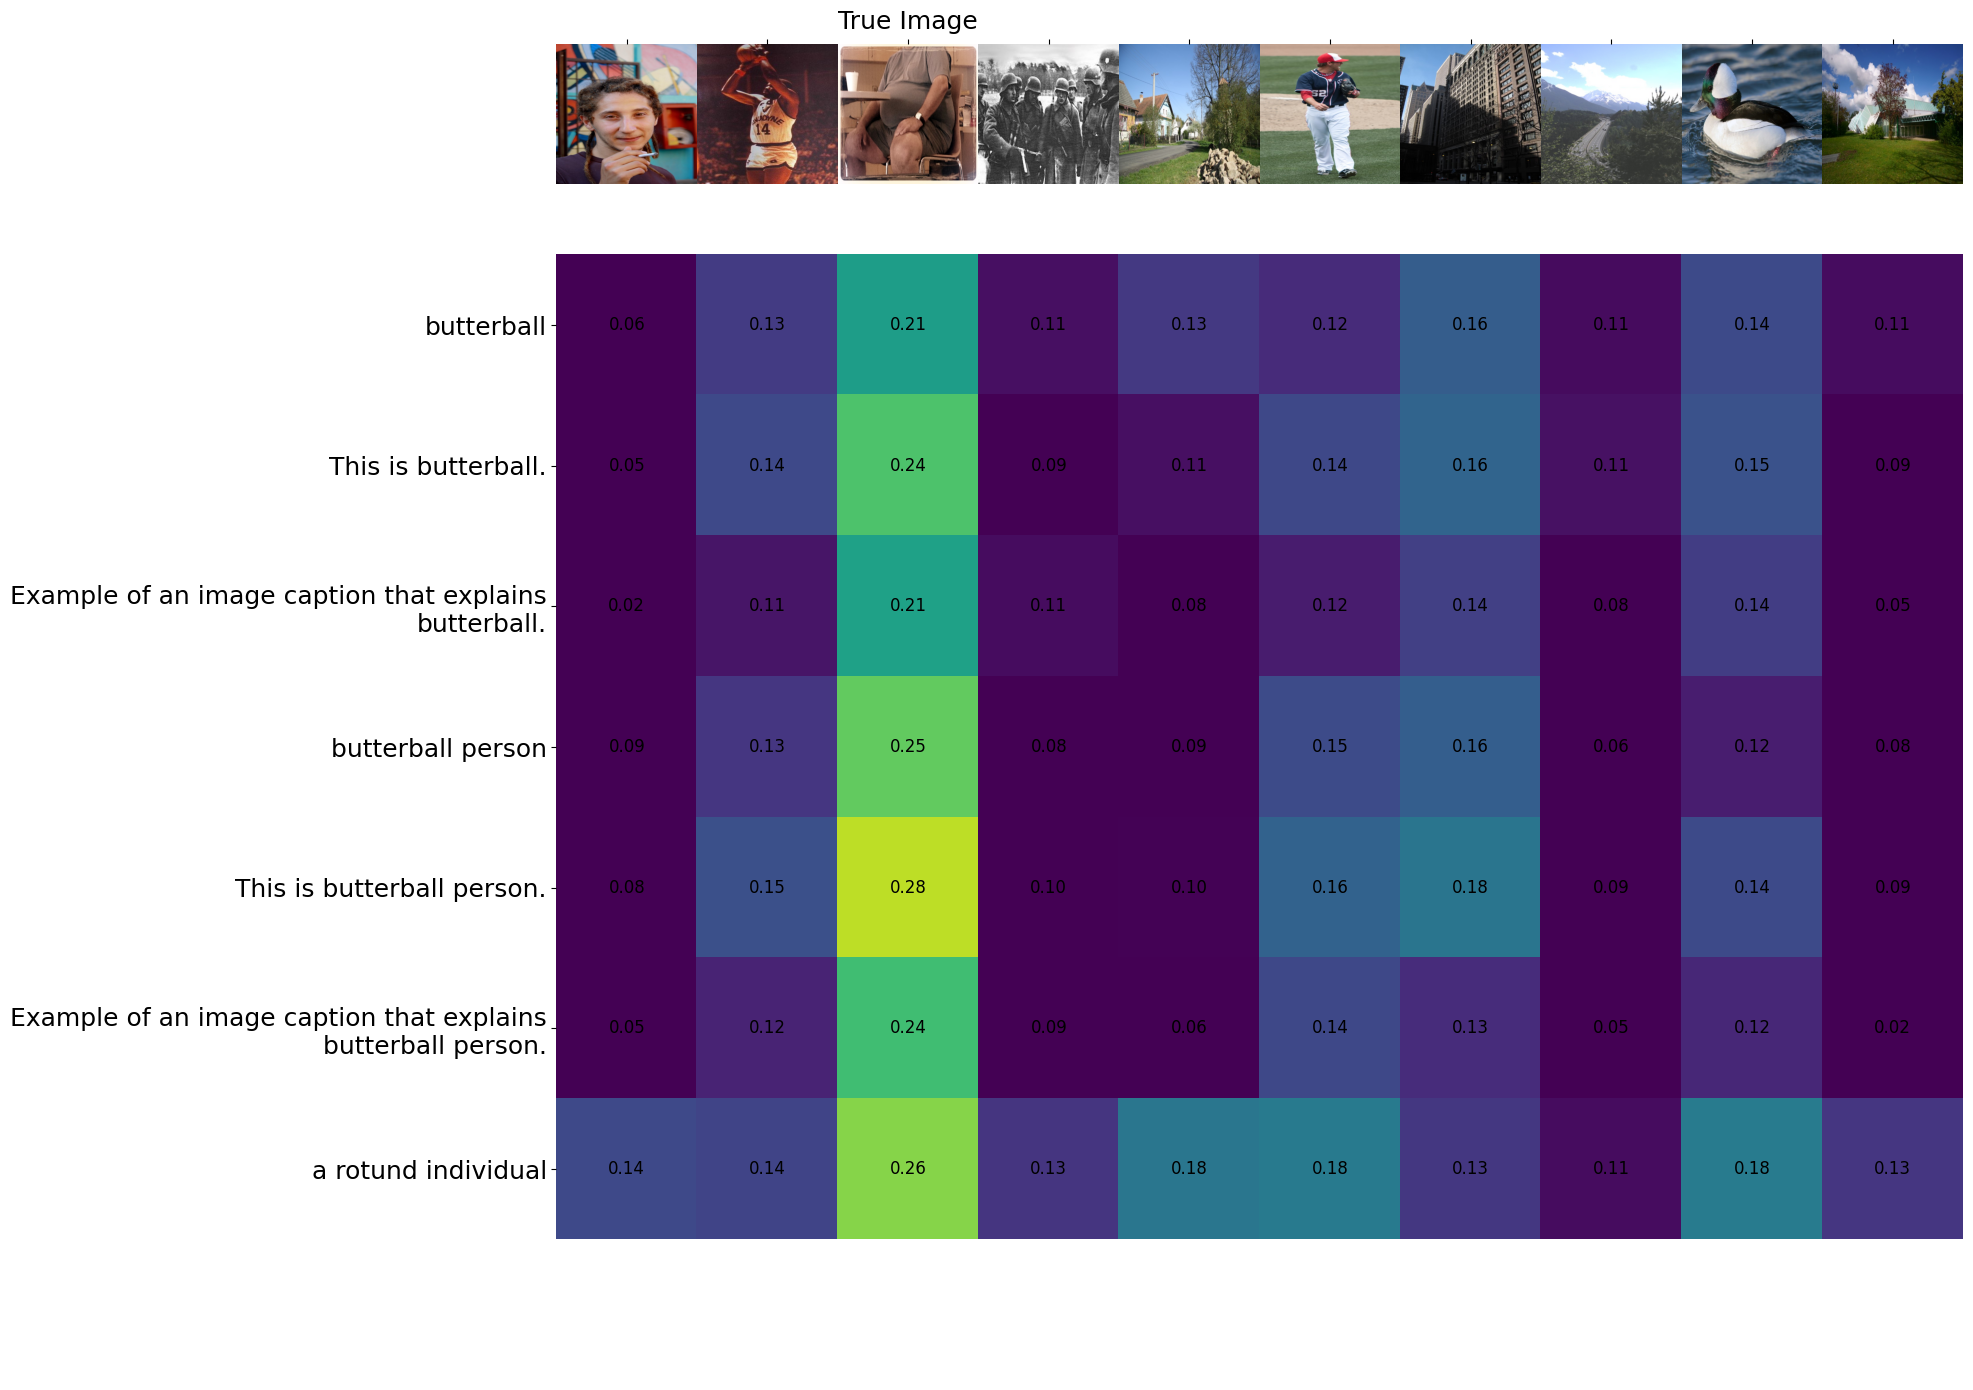

In [ ]:
similarity = np.array(sim) * 0.01
assert similarity.shape[0] == len(texts) and similarity.shape[1] == len(images), \
    f"{similarity.shape} != {(len(images), len(texts))}"
plt.figure(figsize=(22, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
plt.yticks(range(len(texts)), [cap_text(i) for i in texts], fontsize=18)
# if gold_image_index is not None:
plt.xticks(range(len(images)), ['' if i != idx_gold else 'True Image' for i in range(len(images))],
            fontsize=18)
# else:
# plt.xticks(range(len(images)), fontsize=18)
for i, image in enumerate(images):
    plt.imshow(Image.open(image).convert("RGB"), extent=(i - 0.5, i + 0.5, -2.0, -1), origin="lower")

for x in range(len(images)):
    for y in range(len(texts)):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)
for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)
plt.gca().xaxis.tick_top()
plt.xlim([-0.5, len(images) - 0.5])
plt.ylim([len(texts) + 0.5, -2])
plt.tight_layout()

plt.savefig('wn_disam_pred.png', bbox_inches='tight')
plt.plot()

In [ ]:
save_predictions(all_img_pred, 'en.test.preds_clipMono_wn.txt')

In [ ]:
# df = pd.DataFrame(result)
# for (prompt, input_type), g in df.groupby(['prompt', 'input_type']):
#   # print(prompt, input_type, g)
#     path = path_join(opt.output_dir, f'{prompt.replace("<>", "mask")}.{input_type}'.replace(" ", "_"))
#     print(path)

#     os.makedirs(path, exist_ok=True)
#     with open(path_join(path, f'prediction.{opt.language}.txt'), 'w') as f:
#         f.write('\n'.join(['\t'.join(x) for x in g.sort_values(by=['data'])['candidate'].to_list()]))
#     g.to_csv(path_join(path, f'full_result.{opt.language}.csv'), index=False)

## Multilingual

In [ ]:
class CLIPMultilingual:
    def __init__(self, img_model, text_model):

        self.img_model = img_model
        self.text_model = text_model

        self.device = 'cuda' if torch.cuda.device_count() > 0 else 'cpu'

        self.img_model.to(self.device)
        self.text_model.to(self.device)
        self.cos = torch.nn.CosineSimilarity(dim=2, eps=1e-6)

    def get_similarity(self, images: List or str, texts: List or str, batch_size: int = None):
        self.img_model.eval()
        self.text_model.eval()

        images = [images] if type(images) is str else images
        texts = [texts] if type(texts) is str else texts

        pil_images = [Image.open(i).convert("RGB") for i in images]

        with torch.no_grad():
            result_images = torch.tensor(self.img_model.encode(pil_images))

        with torch.no_grad():
            res_texts = torch.tensor(self.text_model.encode(texts))

        sim = self.cos(
            result_images.unsqueeze(1).repeat((1, len(res_texts), 1)),
            res_texts.unsqueeze(0).repeat((len(result_images), 1, 1))
        ) * 100  # image size x text size
        return sim.cpu().numpy().T

In [ ]:
img_model = SentenceTransformer('clip-ViT-B-32')
text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')
clip = CLIPMultilingual(img_model, text_model)

In [ ]:
all_gold=[]
all_pred=[]
all_sim = []
all_img_pred = []
result = []

for key, value in tqdm(enumerate(data_en), total = len(data_en), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


  texts=[p[0] for p in prompt_list]
  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = clip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

  best_sim = int(sim.argmax()%num_images)

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)
  # if key == 10:
  #   break



In [ ]:
print(all_pred)
print(all_gold)

In [ ]:
get_accuracy(np.array(all_pred), np.array(all_gold))

In [ ]:
save_predictions(all_img_pred, 'it.test.preds_clipMulti_wn.txt')

In [ ]:
all_gold=[]
all_pred=[]
all_sim = []
all_img_pred = []
result = []

for key, value in tqdm(enumerate(data_fa), total = len(data_fa), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


  texts=[p[0] for p in prompt_list]
  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = clip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

  best_sim = int(sim.argmax()%num_images)

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)

  # if key == 10:
  #   break


100%|██████████| 200/200 [00:27<00:00,  7.34it/s]


In [ ]:
print(all_pred)
print(all_gold)

[1, 3, 4, 8, 6, 2, 8, 5, 5, 1, 8, 5, 9, 6, 4, 6, 3, 0, 8, 9, 5, 9, 4, 4, 4, 0, 7, 0, 8, 1, 6, 4, 8, 6, 9, 3, 8, 1, 5, 7, 7, 3, 1, 7, 1, 3, 0, 8, 0, 8, 7, 5, 1, 0, 2, 8, 8, 4, 7, 5, 6, 7, 3, 8, 8, 6, 1, 5, 2, 9, 5, 0, 0, 8, 0, 8, 3, 1, 2, 1, 7, 6, 7, 8, 9, 8, 2, 6, 4, 9, 0, 6, 2, 8, 4, 1, 9, 0, 5, 6, 5, 4, 3, 3, 8, 7, 4, 8, 6, 7, 8, 0, 6, 2, 7, 5, 5, 2, 9, 7, 3, 5, 3, 7, 5, 8, 4, 3, 0, 0, 7, 6, 9, 7, 2, 6, 2, 9, 5, 9, 0, 6, 4, 9, 8, 2, 9, 8, 0, 8, 6, 1, 5, 5, 7, 6, 9, 4, 3, 2, 0, 0, 4, 3, 5, 1, 3, 5, 6, 6, 5, 3, 3, 2, 9, 2, 7, 9, 6, 1, 0, 8, 2, 7, 3, 9, 4, 0, 3, 0, 6, 7, 3, 2, 5, 0, 8, 7, 5, 6]
[3, 3, 8, 8, 2, 4, 5, 5, 8, 1, 9, 9, 2, 5, 8, 1, 8, 0, 9, 7, 2, 1, 6, 4, 0, 7, 7, 0, 6, 4, 3, 4, 5, 8, 9, 6, 9, 2, 6, 3, 7, 9, 5, 6, 7, 8, 7, 8, 8, 9, 2, 0, 7, 0, 8, 9, 3, 0, 3, 9, 7, 7, 9, 5, 8, 1, 9, 4, 8, 1, 5, 2, 6, 8, 6, 2, 6, 8, 5, 6, 5, 1, 2, 5, 8, 8, 8, 1, 1, 3, 5, 6, 2, 4, 2, 8, 8, 4, 4, 0, 7, 2, 8, 3, 0, 8, 3, 4, 9, 7, 4, 7, 3, 7, 6, 8, 5, 0, 4, 8, 0, 5, 3, 2, 5, 8, 7, 6, 9, 1, 7, 1, 4,

In [ ]:
get_accuracy(np.array(all_pred), np.array(all_gold))

0.2

In [ ]:
save_predictions(all_img_pred, 'fa.test.preds_clipMulti_wn.txt')

## Multilingual translator

In [ ]:
def collate_fn(inputs: Dict, batch_size: int = None):
    size = len(list(inputs.values())[0])
    batch_size = size if batch_size is None or batch_size > size else batch_size
    block = list(range(0, size, batch_size)) + [size] #create un array con step batch_size: [0, batch_size*1, batch_size*2, ...]
    batch_data = []
    for s, e in zip(block[:-1], block[1:]):
        batch_data.append({k: v[s:e] for k, v in inputs.items()}) # create an array with all the batches
    return batch_data

class CLIP:
    def __init__(self, model, processor, config):

        self.model = model
        self.processor = processor
        self.config = config

        self.device = 'cuda' if torch.cuda.device_count() > 0 else 'cpu'

        self.model.to(self.device)
        self.cos = torch.nn.CosineSimilarity(dim=2, eps=1e-6)

    def get_similarity(self, images: List or str, texts: List or str, batch_size: int = None):
        self.model.eval()

        images = [images] if type(images) is str else images
        texts = [texts] if type(texts) is str else texts

        # print(f'texts: {texts}, images: {images}')



        #image_inputs is an object with a 'pixel_values' tensor property with shape: size(10) X channels X width X height
        #also image_inputs.values is valid to get 'pixel_values'
        logging.debug(f'model inference on images: {len(images)}')
        pil_images = [Image.open(i).convert("RGB") for i in images]
        image_inputs = self.processor(images=pil_images, return_tensors="pt", padding=True) # embed the images into: batch X channels X 336 X 366 (specified by the model pretrained imported) (e.g 'openai/clip-vit-large-patch14-336')
        batch_image_inputs = self.collate_fn(image_inputs, batch_size=batch_size)
        # print(pil_images)
        # print(image_inputs['pixel_values'].shape)
        # print(image_inputs.keys())

        with torch.no_grad():
            output_image_embedding = []
            for i in batch_image_inputs:
                output_image_embedding.append(
                    self.model.get_image_features(**{k: v.to(self.device) for k, v in i.items()}) # embed the images into: batch X 768 (create an embedding for the images)
                )
            output_image_embedding = torch.cat(output_image_embedding)


        logging.debug(f'model inference on texts: {len(texts)}')
        text_inputs = self.processor(text=texts, return_tensors="pt", padding=True)
        batch_text_inputs = self.collate_fn(text_inputs, batch_size=batch_size)

        with torch.no_grad():
            output_text_embedding = []
            for i in batch_text_inputs:
                output_text_embedding.append(
                    self.model.get_text_features(**{k: v.to(self.device) for k, v in i.items()}) # embed the texts into: batch X 768 (create an embedding for the texts)
                )
        output_text_embedding = torch.cat(output_text_embedding)
        logging.debug('compute similarity')

        sim = self.cos(
            output_image_embedding.unsqueeze(1).repeat((1, len(output_text_embedding), 1)),
            output_text_embedding.unsqueeze(0).repeat((len(output_image_embedding), 1, 1))
        ) * 100  # image size x text size
        return sim.cpu().numpy().T

    def collate_fn(self, inputs: Dict, batch_size: int = None):
      size = len(list(inputs.values())[0])
      batch_size = size if batch_size is None or batch_size > size else batch_size
      block = list(range(0, size, batch_size)) + [size] #create un array con step batch_size: [0, batch_size*1, batch_size*2, ...]
      batch_data = []
      for s, e in zip(block[:-1], block[1:]):
          batch_data.append({k: v[s:e] for k, v in inputs.items()}) # create an array with all the batches
      return batch_data

In [ ]:
model = CLIPModel.from_pretrained('laion/CLIP-ViT-g-14-laion2B-s12B-b42K')
processor = CLIPProcessor.from_pretrained('laion/CLIP-ViT-g-14-laion2B-s12B-b42K')

config = model.config.to_dict()

clip = CLIP(model, processor, config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.47G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
from googletrans import Translator, LANGUAGES

def translateToEnglish(testo, src='it'):
    traduttore = Translator()
    traduzione = traduttore.translate(testo, src=src, dest='en')
    return traduzione.text

# # Esempio di utilizzo
# frase_italiana = "Ciao mondo!"
# frase_inglese = translateToEnglish(frase_italiana)
# print(f"Frase in italiano: {frase_italiana}")
# print(f"Frase in inglese: {frase_inglese}")

In [ ]:
# all_gold=[]
# all_pred=[]
# all_sim = []
# all_img_pred = []
# result = []

# target_phrase_it_en = 0

# f_it_en = open('translate_phrase_fa_en.txt', 'w')

# for key, value in tqdm(enumerate(data_fa), total = len(data_fa), leave = True):

#   target_word = value['target_word']
#   target_phrase = value['target_phrase']


#   target_phrase_en = translateToEnglish(target_phrase, src='fa')

#   f_it_en.write(f'{target_phrase} \t {target_phrase_en}\n')

#   texts=[target_phrase, target_phrase_en]

#   print(f'texts: {texts}')

# f_it_en.close()




In [ ]:
f = open('/content/translate_phrase_it_en.txt', 'r')
phrases = [line.strip().split('\t')[-1].strip() for line in f]
f.close()

In [ ]:
all_gold=[]
all_pred=[]
all_avg_pred = []
all_sim = []
all_img_pred = []
result = []

for key, value in tqdm(enumerate(data_it), total = len(data_it), leave = True):

  texts=[phrases[key]]

  print(f'texts: {texts}')

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = clip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)
  avg_sim = sim.mean(axis=0)

  best_avg_sim = avg_sim.argmax()
  best_sim = int(sim.argmax()%num_images)

  print(f'best_avg_sim: {best_avg_sim}, best_sim: {best_sim}, idx_gold: {idx_gold}')

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_avg_pred.append(best_avg_sim)

  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)

  # if key == 10:
  #   break



  0%|          | 0/305 [00:00<?, ?it/s]

texts: ['rubber to remove']


  0%|          | 1/305 [00:03<17:22,  3.43s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 2
texts: ['donkey card game']


  1%|          | 2/305 [00:05<12:03,  2.39s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['mission column']


  1%|          | 3/305 [00:06<10:18,  2.05s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 6
texts: ['Box for infants']


  1%|▏         | 4/305 [00:08<09:30,  1.89s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['measurement bubble']


  2%|▏         | 5/305 [00:10<09:02,  1.81s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 1
texts: ['desktop']


  2%|▏         | 6/305 [00:11<08:46,  1.76s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 4
texts: ['Durone shrub']


  2%|▏         | 7/305 [00:13<08:36,  1.73s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 6
texts: ['Alfiere moves diagonally']


  3%|▎         | 8/305 [00:15<08:28,  1.71s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['creeping snail']


  3%|▎         | 9/305 [00:16<08:23,  1.70s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Aquila stars']


  3%|▎         | 10/305 [00:18<08:19,  1.69s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Exhibition execution']


  4%|▎         | 11/305 [00:20<08:17,  1.69s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 2
texts: ['water jellyfish']


  4%|▍         | 12/305 [00:21<08:15,  1.69s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['firewole']


  4%|▍         | 13/305 [00:23<08:14,  1.69s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 6
texts: ['lake basin']


  5%|▍         | 14/305 [00:25<08:13,  1.70s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 8
texts: ['aquatic beard']


  5%|▍         | 15/305 [00:26<08:11,  1.70s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 0
texts: ['mimosa nature']


  5%|▌         | 16/305 [00:28<08:09,  1.69s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['battle ram']


  6%|▌         | 17/305 [00:30<08:07,  1.69s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 9
texts: ['Ice iceberg']


  6%|▌         | 18/305 [00:31<08:05,  1.69s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Centaur space']


  6%|▌         | 19/305 [00:33<08:04,  1.70s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Aries in Heaven']


  7%|▋         | 20/305 [00:35<08:03,  1.70s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Playing card']


  7%|▋         | 21/305 [00:37<08:04,  1.71s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['snowflake']


  7%|▋         | 22/305 [00:38<08:04,  1.71s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['moscow hair']


  8%|▊         | 23/305 [00:40<08:02,  1.71s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 0
texts: ['argine of a dam']


  8%|▊         | 24/305 [00:42<08:01,  1.71s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['boat tree']


  8%|▊         | 25/305 [00:43<08:01,  1.72s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 2
texts: ['galaxy crane']


  9%|▊         | 26/305 [00:45<07:59,  1.72s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 6
texts: ['diuretic onion']


  9%|▉         | 27/305 [00:47<08:00,  1.73s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Iride Fiore']


  9%|▉         | 28/305 [00:49<08:02,  1.74s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Angel of Paradise']


 10%|▉         | 29/305 [00:50<08:02,  1.75s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 5
texts: ['Opening of a game']


 10%|▉         | 30/305 [00:52<08:02,  1.75s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 2
texts: ['workshop']


 10%|█         | 31/305 [00:54<08:02,  1.76s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Limetta for nails']


 10%|█         | 32/305 [00:56<07:59,  1.76s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 4
texts: ['iron']


 11%|█         | 33/305 [00:58<07:59,  1.76s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Bomb of Crema']


 11%|█         | 34/305 [00:59<07:59,  1.77s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 3
texts: ['organ']


 11%|█▏        | 35/305 [01:01<07:58,  1.77s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Palo auction']


 12%|█▏        | 36/305 [01:03<07:57,  1.78s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 4
texts: ['rubber on the trunk']


 12%|█▏        | 37/305 [01:05<07:54,  1.77s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['monocle candy']


 12%|█▏        | 38/305 [01:06<07:52,  1.77s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 4
texts: ['forest lion']


 13%|█▎        | 39/305 [01:08<07:51,  1.77s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['skin bubble']


 13%|█▎        | 40/305 [01:10<07:50,  1.78s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 6
texts: ['volatile pen']


 13%|█▎        | 41/305 [01:12<07:49,  1.78s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 5
texts: ['chain of a vehicle']


 14%|█▍        | 42/305 [01:14<07:48,  1.78s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 0
texts: ['curl combing']


 14%|█▍        | 43/305 [01:15<07:46,  1.78s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['icon folder']


 14%|█▍        | 44/305 [01:17<07:44,  1.78s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 3
texts: ['cocoa bar']


 15%|█▍        | 45/305 [01:19<07:43,  1.78s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 8
texts: ['bacterium coconut']


 15%|█▌        | 46/305 [01:21<07:43,  1.79s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 3
texts: ['Baco nature']


 15%|█▌        | 47/305 [01:23<07:42,  1.79s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 2
texts: ['duvet to warm up']


 16%|█▌        | 48/305 [01:24<07:40,  1.79s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Cassa combination']


 16%|█▌        | 49/305 [01:26<07:39,  1.79s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 8
texts: ['Babel Torre']


 16%|█▋        | 50/305 [01:28<07:38,  1.80s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['chameleon stars']


 17%|█▋        | 51/305 [01:30<07:35,  1.79s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['battery to play']


 17%|█▋        | 52/305 [01:31<07:32,  1.79s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 9
texts: ['JFK Person']


 17%|█▋        | 53/305 [01:33<07:31,  1.79s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Scarpa heel']


 18%|█▊        | 54/305 [01:35<07:30,  1.80s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 0
texts: ['swimming cap']


 18%|█▊        | 55/305 [01:37<07:29,  1.80s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['terrestrial orbit']


 18%|█▊        | 56/305 [01:39<07:26,  1.79s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['rose in architecture']


 19%|█▊        | 57/305 [01:40<07:23,  1.79s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 8
texts: ['flowers crown']


 19%|█▉        | 58/305 [01:42<07:23,  1.79s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['quadrupete blade']


 19%|█▉        | 59/305 [01:44<07:23,  1.80s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 3
texts: ['Muro Sport']


 20%|█▉        | 60/305 [01:46<07:22,  1.81s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 6
texts: ['climbing plant']


 20%|██        | 61/305 [01:48<07:20,  1.81s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['hold']


 20%|██        | 62/305 [01:49<07:17,  1.80s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['queue queue']


 21%|██        | 63/305 [01:51<07:15,  1.80s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['cappuccino mammifer']


 21%|██        | 64/305 [01:53<07:15,  1.81s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 7
texts: ['bow rod']


 21%|██▏       | 65/305 [01:55<07:14,  1.81s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 2
texts: ['coffee in a cup']


 22%|██▏       | 66/305 [01:57<07:13,  1.82s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['pocket onion']


 22%|██▏       | 67/305 [01:59<07:14,  1.82s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 9
texts: ['iceberg to eat']


 22%|██▏       | 68/305 [02:00<07:12,  1.83s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 1
texts: ['water hedgehog']


 23%|██▎       | 69/305 [02:02<07:11,  1.83s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 5
texts: ['linen fabric']


 23%|██▎       | 70/305 [02:04<07:11,  1.83s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 4
texts: ['Ocular retina']


 23%|██▎       | 71/305 [02:06<07:11,  1.85s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['custard']


 24%|██▎       | 72/305 [02:08<07:10,  1.85s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['steel file']


 24%|██▍       | 73/305 [02:10<07:09,  1.85s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['photographic lens']


 24%|██▍       | 74/305 [02:12<07:08,  1.85s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['animal ram']


 25%|██▍       | 75/305 [02:13<07:07,  1.86s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Retina for hair']


 25%|██▍       | 76/305 [02:15<07:06,  1.86s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 1
texts: ['cotta armor']


 25%|██▌       | 77/305 [02:17<07:05,  1.87s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 9
texts: ['Galletto mushroom']


 26%|██▌       | 78/305 [02:19<07:05,  1.87s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['waterproof for bad weather']


 26%|██▌       | 79/305 [02:21<07:04,  1.88s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['Ciccia obese']


 26%|██▌       | 80/305 [02:23<07:03,  1.88s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['florit']


 27%|██▋       | 81/305 [02:25<07:02,  1.89s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 2
texts: ['flash and thunder']


 27%|██▋       | 82/305 [02:27<07:02,  1.89s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['Truncum stem']


 27%|██▋       | 83/305 [02:29<07:01,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['valley']


 28%|██▊       | 84/305 [02:30<07:00,  1.90s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Giacinto Gemma']


 28%|██▊       | 85/305 [02:32<06:59,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 1
texts: ['Mantella hood']


 28%|██▊       | 86/305 [02:34<06:58,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 8
texts: ['Mimo actor']


 29%|██▊       | 87/305 [02:36<06:56,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['animal eagle']


 29%|██▉       | 88/305 [02:38<06:55,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['tank']


 29%|██▉       | 89/305 [02:40<06:54,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 5
texts: ['Rocco stick']


 30%|██▉       | 90/305 [02:42<06:54,  1.93s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 2
texts: ['coconut']


 30%|██▉       | 91/305 [02:44<06:52,  1.93s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['coca drink']


 30%|███       | 92/305 [02:46<06:51,  1.93s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['plan of an condominium']


 30%|███       | 93/305 [02:48<06:49,  1.93s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 8
texts: ['fodder grass']


 31%|███       | 94/305 [02:50<06:47,  1.93s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['Punting needle']


 31%|███       | 95/305 [02:52<06:46,  1.93s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 7
texts: ['food rice']


 31%|███▏      | 96/305 [02:54<06:43,  1.93s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['helix of an engine']


 32%|███▏      | 97/305 [02:56<06:41,  1.93s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 6
texts: ['jaundice infection']


 32%|███▏      | 98/305 [02:57<06:39,  1.93s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['broth nut']


 32%|███▏      | 99/305 [02:59<06:37,  1.93s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 8
texts: ['bird crane']


 33%|███▎      | 100/305 [03:01<06:34,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Ambrosia Dessert']


 33%|███▎      | 101/305 [03:03<06:32,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['gaming disco']


 33%|███▎      | 102/305 [03:05<06:29,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 4
texts: ['motor oil']


 34%|███▍      | 103/305 [03:07<06:27,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['medieval carousel']


 34%|███▍      | 104/305 [03:09<06:26,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 5
texts: ['opening key']


 34%|███▍      | 105/305 [03:11<06:23,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['puree cream']


 35%|███▍      | 106/305 [03:13<06:20,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['mineral drink']


 35%|███▌      | 107/305 [03:15<06:18,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Mazza for works']


 35%|███▌      | 108/305 [03:17<06:16,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['perfumed bell']


 36%|███▌      | 109/305 [03:19<06:14,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Petrol motorcycle']


 36%|███▌      | 110/305 [03:20<06:12,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Limetta citrume']


 36%|███▋      | 111/305 [03:22<06:09,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['flash flash']


 37%|███▋      | 112/305 [03:24<06:07,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 6
texts: ['drinkable manhattan']


 37%|███▋      | 113/305 [03:26<06:05,  1.90s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['hammer with gills']


 37%|███▋      | 114/305 [03:28<06:03,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 4
texts: ['Passerina grape']


 38%|███▊      | 115/305 [03:30<06:01,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['royal crown']


 38%|███▊      | 116/305 [03:32<05:59,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 6
texts: ['espresso']


 38%|███▊      | 117/305 [03:34<05:57,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['water waterfall']


 39%|███▊      | 118/305 [03:36<05:55,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Cuckoo clock']


 39%|███▉      | 119/305 [03:38<05:54,  1.90s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['Cassa Supermarket']


 39%|███▉      | 120/305 [03:39<05:51,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['tied with bow']


 40%|███▉      | 121/305 [03:41<05:50,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 7
texts: ['door of a building']


 40%|████      | 122/305 [03:43<05:48,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Bottom to hang']


 40%|████      | 123/305 [03:45<05:46,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 7
texts: ['cricket bat']


 41%|████      | 124/305 [03:47<05:43,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 4
texts: ['roller movies']


 41%|████      | 125/305 [03:49<05:42,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 6
texts: ['container jug']


 41%|████▏     | 126/305 [03:51<05:41,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['wedding faith']


 42%|████▏     | 127/305 [03:53<05:38,  1.90s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 2
texts: ['volatile nest']


 42%|████▏     | 128/305 [03:55<05:36,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['wool thread']


 42%|████▏     | 129/305 [03:57<05:35,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['multinational chain']


 43%|████▎     | 130/305 [03:58<05:33,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 6
texts: ['Libra constellation']


 43%|████▎     | 131/305 [04:00<05:31,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Campaign plot']


 43%|████▎     | 132/305 [04:02<05:30,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 6
texts: ['water ram']


 44%|████▎     | 133/305 [04:04<05:28,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 9
texts: ['lace fabric']


 44%|████▍     | 134/305 [04:06<05:26,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['coriander of paper']


 44%|████▍     | 135/305 [04:08<05:23,  1.90s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 2
texts: ['baseball bat']


 45%|████▍     | 136/305 [04:10<05:22,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['amphibious frog']


 45%|████▍     | 137/305 [04:12<05:23,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['port liqueur']


 45%|████▌     | 138/305 [04:14<05:20,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Olympics horse']


 46%|████▌     | 139/305 [04:16<05:18,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 6
texts: ['Coccio fish']


 46%|████▌     | 140/305 [04:18<05:17,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 1
texts: ['volatile lira']


 46%|████▌     | 141/305 [04:20<05:13,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 7
texts: ['bone fracture']


 47%|████▋     | 142/305 [04:21<05:12,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['mint sugared almonds']


 47%|████▋     | 143/305 [04:23<05:10,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Dracaena reptile']


 47%|████▋     | 144/305 [04:25<05:07,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['lion stellar system']


 48%|████▊     | 145/305 [04:27<05:04,  1.90s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['fallen in the mountains']


 48%|████▊     | 146/305 [04:29<05:02,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 7
texts: ['beard in the face']


 48%|████▊     | 147/305 [04:31<05:01,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['carambola seed']


 49%|████▊     | 148/305 [04:33<04:59,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 4
texts: ['Ambra stone']


 49%|████▉     | 149/305 [04:35<04:58,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 0
texts: ['construction axis']


 49%|████▉     | 150/305 [04:37<04:56,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 0
texts: ['Argonauta di mare']


 50%|████▉     | 151/305 [04:39<04:54,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['heavy medium crane']


 50%|████▉     | 152/305 [04:41<04:52,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['weapon battery']


 50%|█████     | 153/305 [04:42<04:50,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['briscola of sticks']


 50%|█████     | 154/305 [04:44<04:48,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Navigate the web']


 51%|█████     | 155/305 [04:46<04:46,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['express delivery']


 51%|█████     | 156/305 [04:48<04:45,  1.92s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['pork in mud']


 51%|█████▏    | 157/305 [04:50<04:43,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['volatile sandstone']


 52%|█████▏    | 158/305 [04:52<04:42,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 0
texts: ['religious machine gun']


 52%|█████▏    | 159/305 [04:54<04:40,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 8
texts: ['hull of a boat']


 52%|█████▏    | 160/305 [04:56<04:38,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 2
texts: ['Nest for children']


 53%|█████▎    | 161/305 [04:58<04:36,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 3
texts: ['recyclable cardboard']


 53%|█████▎    | 162/305 [05:00<04:33,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Seahorse']


 53%|█████▎    | 163/305 [05:02<04:32,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Cararer Expectation']


 54%|█████▍    | 164/305 [05:04<04:30,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 1
texts: ['water angel']


 54%|█████▍    | 165/305 [05:05<04:28,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 8
texts: ['Explosion bomb']


 54%|█████▍    | 166/305 [05:07<04:26,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Cucù bird']


 55%|█████▍    | 167/305 [05:09<04:23,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 6
texts: ['Sarto needle']


 55%|█████▌    | 168/305 [05:11<04:22,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['swivel food']


 55%|█████▌    | 169/305 [05:13<04:20,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['foamy mousse']


 56%|█████▌    | 170/305 [05:15<04:18,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Bongo congreg']


 56%|█████▌    | 171/305 [05:17<04:16,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 9
texts: ['human carcass']


 56%|█████▋    | 172/305 [05:19<04:15,  1.92s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 4
texts: ['celebrate Masses']


 57%|█████▋    | 173/305 [05:21<04:13,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 6
texts: ['Gym handlebar']


 57%|█████▋    | 174/305 [05:23<04:11,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 1
texts: ['Environment kitchen']


 57%|█████▋    | 175/305 [05:25<04:09,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Swan in a lake']


 58%|█████▊    | 176/305 [05:27<04:07,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['grenade ammunition']


 58%|█████▊    | 177/305 [05:28<04:05,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Calcagno del foot']


 58%|█████▊    | 178/305 [05:30<04:04,  1.92s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 4
texts: ['mint seedling']


 59%|█████▊    | 179/305 [05:32<04:02,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['golf-club']


 59%|█████▉    | 180/305 [05:34<04:00,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['goalkeeper in a sport']


 59%|█████▉    | 181/305 [05:36<03:58,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['kilos spice']


 60%|█████▉    | 182/305 [05:38<03:56,  1.92s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['Durone Callo']


 60%|██████    | 183/305 [05:40<03:54,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Radio Avambraccio']


 60%|██████    | 184/305 [05:42<03:52,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 1
texts: ['Erbe absinthe']


 61%|██████    | 185/305 [05:44<03:50,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 2
texts: ['sniff']


 61%|██████    | 186/305 [05:46<03:49,  1.93s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 2
texts: ['animal ghigtone']


 61%|██████▏   | 187/305 [05:48<03:47,  1.93s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['volatile parrot']


 62%|██████▏   | 188/305 [05:50<03:45,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['butterfly tie']


 62%|██████▏   | 189/305 [05:52<03:43,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['jaundice']


 62%|██████▏   | 190/305 [05:53<03:41,  1.92s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 0
texts: ['head of the coach']


 63%|██████▎   | 191/305 [05:55<03:38,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['work folder']


 63%|██████▎   | 192/305 [05:57<03:36,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 2
texts: ['pointed nail']


 63%|██████▎   | 193/305 [05:59<03:34,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Aquarium bathtub']


 64%|██████▎   | 194/305 [06:01<03:33,  1.92s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['Pipistrello shawl']


 64%|██████▍   | 195/305 [06:03<03:31,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 9
texts: ['bas -relief in a frieze']


 64%|██████▍   | 196/305 [06:05<03:30,  1.93s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Golosone Ghitottone']


 65%|██████▍   | 197/305 [06:07<03:28,  1.93s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 1
texts: ['ox to grazing']


 65%|██████▍   | 198/305 [06:09<03:25,  1.93s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['pipe to smoke']


 65%|██████▌   | 199/305 [06:11<03:23,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['sanitary bath']


 66%|██████▌   | 200/305 [06:13<03:21,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Light piece horse']


 66%|██████▌   | 201/305 [06:15<03:19,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 0
texts: ['Adam and Eve']


 66%|██████▌   | 202/305 [06:17<03:17,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['digestive absinthe']


 67%|██████▋   | 203/305 [06:18<03:15,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['frog']


 67%|██████▋   | 204/305 [06:20<03:13,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 0
texts: ['dye for dye']


 67%|██████▋   | 205/305 [06:22<03:11,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['car garage']


 68%|██████▊   | 206/305 [06:24<03:09,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['depression depression']


 68%|██████▊   | 207/305 [06:26<03:07,  1.92s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 6
texts: ['Auction of a game']


 68%|██████▊   | 208/305 [06:28<03:06,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 6
texts: ['double weapon']


 69%|██████▊   | 209/305 [06:30<03:03,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['glue sticker']


 69%|██████▉   | 210/305 [06:32<03:01,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['crown astronomy']


 69%|██████▉   | 211/305 [06:34<02:59,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 4
texts: ['onion hairstyle']


 70%|██████▉   | 212/305 [06:36<02:57,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 8
texts: ['nut to play']


 70%|██████▉   | 213/305 [06:38<02:56,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 6
texts: ['parrot to urinate']


 70%|███████   | 214/305 [06:40<02:54,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 9
texts: ['volatile dancer']


 70%|███████   | 215/305 [06:41<02:52,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 6
texts: ['Pluto Mass']


 71%|███████   | 216/305 [06:43<02:50,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 0
texts: ['Aquarium astronomy']


 71%|███████   | 217/305 [06:45<02:48,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 1
texts: ['hunting season']


 71%|███████▏  | 218/305 [06:47<02:46,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['human neck']


 72%|███████▏  | 219/305 [06:49<02:44,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['home bell']


 72%|███████▏  | 220/305 [06:51<02:43,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Bongo Mammifer']


 72%|███████▏  | 221/305 [06:53<02:41,  1.93s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 8
texts: ['Aurora of the morning']


 73%|███████▎  | 222/305 [06:55<02:39,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 9
texts: ['Tail cut']


 73%|███████▎  | 223/305 [06:57<02:37,  1.92s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Fruit peel']


 73%|███████▎  | 224/305 [06:59<02:35,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['string thread']


 74%|███████▍  | 225/305 [07:01<02:33,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['peach fruit']


 74%|███████▍  | 226/305 [07:03<02:31,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Guantoni box']


 74%|███████▍  | 227/305 [07:04<02:29,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 3
texts: ['Mammal Riccio']


 75%|███████▍  | 228/305 [07:06<02:27,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 6
texts: ['key to unscrew']


 75%|███████▌  | 229/305 [07:08<02:25,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 4
texts: ['cylinder of a magician']


 75%|███████▌  | 230/305 [07:10<02:23,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Libra and kilos']


 76%|███████▌  | 231/305 [07:12<02:21,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 3
texts: ['axis of human']


 76%|███████▌  | 232/305 [07:14<02:19,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['plane soundable']


 76%|███████▋  | 233/305 [07:16<02:17,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 9
texts: ['marine shell']


 77%|███████▋  | 234/305 [07:18<02:15,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Ortolano jobs']


 77%|███████▋  | 235/305 [07:20<02:13,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 2
texts: ['Pizzo Peluria']


 77%|███████▋  | 236/305 [07:22<02:12,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 2
texts: ['Mimosa Prosecco']


 78%|███████▊  | 237/305 [07:24<02:10,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['ocular orbit']


 78%|███████▊  | 238/305 [07:26<02:08,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['network door']


 78%|███████▊  | 239/305 [07:27<02:06,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 8
texts: ['coconut']


 79%|███████▊  | 240/305 [07:29<02:04,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 9
texts: ['animal']


 79%|███████▉  | 241/305 [07:31<02:02,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 4
texts: ['volatile griffin']


 79%|███████▉  | 242/305 [07:33<02:01,  1.92s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 1
texts: ['soil throat']


 80%|███████▉  | 243/305 [07:35<01:59,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 4
texts: ['inch measurement']


 80%|████████  | 244/305 [07:37<01:57,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['swimming bathroom']


 80%|████████  | 245/305 [07:39<01:55,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 5
texts: ['Golf Maglione']


 81%|████████  | 246/305 [07:41<01:53,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Balls']


 81%|████████  | 247/305 [07:43<01:51,  1.92s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 1
texts: ['carambola shrub']


 81%|████████▏ | 248/305 [07:45<01:49,  1.92s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['captivity strain']


 82%|████████▏ | 249/305 [07:47<01:47,  1.92s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 7
texts: ['Pigliemche plant']


 82%|████████▏ | 250/305 [07:49<01:45,  1.93s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 6
texts: ['political campaign']


 82%|████████▏ | 251/305 [07:50<01:43,  1.92s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['football handle']


 83%|████████▎ | 252/305 [07:52<01:41,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 4
texts: ['dice for screws']


 83%|████████▎ | 253/305 [07:54<01:39,  1.92s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 8
texts: ['tennis racket']


 83%|████████▎ | 254/305 [07:56<01:37,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 4
texts: ['butterfly swim']


 84%|████████▎ | 255/305 [07:58<01:35,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 1
texts: ['kiwi bird']


 84%|████████▍ | 256/305 [08:00<01:33,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['leek vegetable']


 84%|████████▍ | 257/305 [08:02<01:31,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['electricity battery']


 85%|████████▍ | 258/305 [08:04<01:29,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Hood aspirator']


 85%|████████▍ | 259/305 [08:06<01:28,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 0
texts: ['Bedy Beast']


 85%|████████▌ | 260/305 [08:08<01:26,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 0
texts: ['covered service']


 86%|████████▌ | 261/305 [08:10<01:24,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 3
texts: ['cocoa seed']


 86%|████████▌ | 262/305 [08:12<01:22,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Wand for eating']


 86%|████████▌ | 263/305 [08:13<01:20,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Pool back']


 87%|████████▋ | 264/305 [08:15<01:18,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 0
texts: ['computer kiss']


 87%|████████▋ | 265/305 [08:17<01:16,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 1
texts: ['Dolphin style']


 87%|████████▋ | 266/305 [08:19<01:14,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 7
texts: ['half amphibious']


 88%|████████▊ | 267/305 [08:21<01:12,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Brock washer']


 88%|████████▊ | 268/305 [08:23<01:10,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['laying deposit']


 88%|████████▊ | 269/305 [08:25<01:08,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Slave boat']


 89%|████████▊ | 270/305 [08:27<01:07,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['edible icebox']


 89%|████████▉ | 271/305 [08:29<01:04,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 5
texts: ['Balestra of the Middle Ages']


 89%|████████▉ | 272/305 [08:31<01:02,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 7
texts: ['gate barrier']


 90%|████████▉ | 273/305 [08:33<01:00,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 7
texts: ['marine network']


 90%|████████▉ | 274/305 [08:34<00:59,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 5
texts: ['chew the rubber']


 90%|█████████ | 275/305 [08:36<00:57,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 0
texts: ['ceiling sky']


 90%|█████████ | 276/305 [08:38<00:55,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 2
texts: ['Audio cap']


 91%|█████████ | 277/305 [08:40<00:53,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 6
texts: ['be amphibious']


 91%|█████████ | 278/305 [08:42<00:51,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['navigation channel']


 91%|█████████▏| 279/305 [08:44<00:49,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Bertile Berta']


 92%|█████████▏| 280/305 [08:46<00:47,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 4
texts: ['waist to tighten']


 92%|█████████▏| 281/305 [08:48<00:45,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 4
texts: ['herbivorous donkey']


 92%|█████████▏| 282/305 [08:50<00:43,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['human throat']


 93%|█████████▎| 283/305 [08:52<00:41,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 8
texts: ['bench bench']


 93%|█████████▎| 284/305 [08:54<00:40,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['bearing column']


 93%|█████████▎| 285/305 [08:55<00:38,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['gummy candy']


 94%|█████████▍| 286/305 [08:57<00:36,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['ATROPE insect']


 94%|█████████▍| 287/305 [08:59<00:34,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['scarf boa']


 94%|█████████▍| 288/305 [09:01<00:32,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 3
texts: ['Blister capsule']


 95%|█████████▍| 289/305 [09:03<00:30,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Sticks for a sport']


 95%|█████████▌| 290/305 [09:05<00:28,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['figurine sticker']


 95%|█████████▌| 291/305 [09:07<00:26,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['rice of joy']


 96%|█████████▌| 292/305 [09:09<00:24,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 9
texts: ['paguro hermit']


 96%|█████████▌| 293/305 [09:11<00:22,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['rectile boa']


 96%|█████████▋| 294/305 [09:13<00:21,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Alfiere representative']


 97%|█████████▋| 295/305 [09:15<00:19,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 5
texts: ['Giacinto Foglie']


 97%|█████████▋| 296/305 [09:16<00:17,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 3
texts: ['flag abdomen']


 97%|█████████▋| 297/305 [09:18<00:15,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Food pen']


 98%|█████████▊| 298/305 [09:20<00:13,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 9
texts: ['drinkable oil']


 98%|█████████▊| 299/305 [09:22<00:11,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 8
texts: ['pressurized capsule']


 98%|█████████▊| 300/305 [09:24<00:09,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['animal phoenix']


 99%|█████████▊| 301/305 [09:26<00:07,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Wall Prints']


 99%|█████████▉| 302/305 [09:28<00:05,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 5
texts: ['sea costume']


 99%|█████████▉| 303/305 [09:30<00:03,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 8
texts: ['strain of a tree']


100%|█████████▉| 304/305 [09:32<00:01,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['back back']


100%|██████████| 305/305 [09:34<00:00,  1.88s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3


In [ ]:
print(all_pred)
print(all_gold)

[6, 0, 3, 5, 2, 6, 1, 6, 5, 4, 3, 2, 4, 0, 5, 3, 8, 5, 2, 1, 5, 4, 3, 9, 7, 5, 3, 7, 6, 5, 2, 6, 4, 6, 1, 9, 4, 8, 6, 0, 9, 2, 3, 2, 4, 7, 0, 8, 7, 8, 9, 0, 9, 1, 9, 5, 9, 6, 1, 7, 5, 6, 7, 2, 3, 5, 1, 5, 0, 1, 9, 1, 0, 7, 3, 5, 4, 8, 0, 1, 7, 0, 5, 4, 6, 4, 9, 1, 8, 7, 3, 3, 4, 0, 5, 2, 9, 0, 4, 1, 7, 9, 3, 4, 9, 0, 4, 7, 5, 9, 2, 7, 6, 9, 2, 1, 9, 2, 0, 5, 8, 3, 8, 1, 2, 1, 6, 2, 8, 7, 6, 8, 6, 2, 4, 5, 3, 9, 4, 4, 8, 5, 9, 4, 0, 9, 3, 0, 2, 2, 4, 6, 4, 3, 9, 2, 9, 4, 6, 6, 6, 4, 1, 7, 7, 3, 1, 5, 0, 2, 3, 2, 1, 5, 6, 5, 9, 2, 9, 5, 7, 0, 7, 8, 1, 4, 5, 4, 1, 2, 4, 7, 4, 0, 6, 9, 6, 9, 5, 1, 6, 1, 5, 8, 0, 5, 0, 5, 8, 2, 7, 4, 9, 3, 5, 8, 8, 8, 5, 3, 3, 1, 2, 7, 3, 6, 1, 3, 9, 7, 7, 7, 3, 5, 3, 9, 7, 3, 7, 4, 1, 2, 3, 5, 9, 4, 0, 2, 0, 8, 0, 6, 0, 1, 4, 3, 1, 8, 7, 2, 8, 8, 9, 2, 4, 1, 4, 5, 8, 8, 1, 3, 1, 8, 1, 4, 8, 3, 3, 0, 0, 7, 4, 0, 7, 5, 7, 8, 6, 8, 2, 6, 8, 6, 1, 2, 3, 0, 3, 1, 8, 4, 3, 6, 3]
[2, 0, 6, 5, 1, 4, 6, 6, 5, 4, 2, 2, 6, 8, 0, 3, 9, 5, 2, 1, 5, 4, 0, 9, 2, 6, 3, 7,

In [ ]:
#ITALIAN ACCURACY
get_accuracy(np.array(all_pred), np.array(all_gold))

0.521311475409836

In [ ]:
# save_predictions(all_img_pred, 'it.test.preds_clipMulti_wn.txt')

In [ ]:
f = open('/content/translate_phrase_fa_en.txt', 'r')
phrases = [line.strip().split('\t')[-1].strip() for line in f]
f.close()

In [ ]:
all_gold=[]
all_pred=[]
all_avg_pred = []
all_sim = []
all_img_pred = []
result = []

for key, value in tqdm(enumerate(data_fa), total = len(data_fa), leave = True):

  texts=[phrases[key]]

  print(f'texts: {texts}')

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = clip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)
  avg_sim = sim.mean(axis=0)

  best_avg_sim = avg_sim.argmax()
  best_sim = int(sim.argmax()%num_images)

  print(f'best_avg_sim: {best_avg_sim}, best_sim: {best_sim}, idx_gold: {idx_gold}')

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_avg_pred.append(best_avg_sim)

  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)

  # if key == 10:
  #   break



  0%|          | 0/200 [00:00<?, ?it/s]

texts: ['brass']


  0%|          | 1/200 [00:01<06:06,  1.84s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Wind locust']


  1%|          | 2/200 [00:03<05:59,  1.82s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 3
texts: ['The land of the evening']


  2%|▏         | 3/200 [00:05<05:56,  1.81s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 8
texts: ['Light lens']


  2%|▏         | 4/200 [00:07<05:54,  1.81s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Military ball']


  2%|▎         | 5/200 [00:09<05:52,  1.81s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 2
texts: ['Branch transplant']


  3%|▎         | 6/200 [00:10<05:50,  1.81s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Mug']


  4%|▎         | 7/200 [00:12<05:49,  1.81s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Leopard grip']


  4%|▍         | 8/200 [00:14<05:47,  1.81s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 5
texts: ['Cancer of the Tower of Josa']


  4%|▍         | 9/200 [00:16<05:45,  1.81s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 8
texts: ['elephant tusk']


  5%|▌         | 10/200 [00:18<05:44,  1.81s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Cherry Cup']


  6%|▌         | 11/200 [00:19<05:43,  1.82s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 9
texts: ['Numbers table']


  6%|▌         | 12/200 [00:21<05:41,  1.82s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Zain']


  6%|▋         | 13/200 [00:23<05:40,  1.82s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 2
texts: ['Quebec Province']


  7%|▋         | 14/200 [00:25<05:40,  1.83s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Red language']


  8%|▊         | 15/200 [00:27<05:38,  1.83s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 8
texts: ['Male flag']


  8%|▊         | 16/200 [00:29<05:37,  1.84s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 1
texts: ['Singing strap']


  8%|▊         | 17/200 [00:30<05:36,  1.84s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 8
texts: ['Soldier bead']


  9%|▉         | 18/200 [00:32<05:35,  1.85s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 0
texts: ['Exercise sweat']


 10%|▉         | 19/200 [00:34<05:34,  1.85s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Parsley']


 10%|█         | 20/200 [00:36<05:34,  1.86s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Hydraulic steering']


 10%|█         | 21/200 [00:38<05:32,  1.86s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Milk glass']


 11%|█         | 22/200 [00:40<05:31,  1.86s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 1
texts: ['Sweat drink']


 12%|█▏        | 23/200 [00:42<05:31,  1.87s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 6
texts: ['Akhtar sky']


 12%|█▏        | 24/200 [00:44<05:29,  1.87s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 4
texts: ['Pegasus constellation']


 12%|█▎        | 25/200 [00:45<05:28,  1.88s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['The sound of recurrence']


 13%|█▎        | 26/200 [00:47<05:27,  1.88s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 7
texts: ['Physics lenses']


 14%|█▎        | 27/200 [00:49<05:25,  1.88s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Crankshaft']


 14%|█▍        | 28/200 [00:51<05:25,  1.89s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 0
texts: ['Ski in the snow']


 14%|█▍        | 29/200 [00:53<05:25,  1.90s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Soheil or Perk']


 15%|█▌        | 30/200 [00:55<05:23,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 4
texts: ['I have explosive']


 16%|█▌        | 31/200 [00:57<05:23,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 3
texts: ['Lulu Khodro']


 16%|█▌        | 32/200 [00:59<05:22,  1.92s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 4
texts: ['Self -repression']


 16%|█▋        | 33/200 [01:01<05:21,  1.93s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 5
texts: ['White pimples']


 17%|█▋        | 34/200 [01:03<05:18,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Lot maker']


 18%|█▊        | 35/200 [01:05<05:17,  1.93s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 9
texts: ['Gardening Monkery']


 18%|█▊        | 36/200 [01:07<05:16,  1.93s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Egyptian Sina']


 18%|█▊        | 37/200 [01:09<05:14,  1.93s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 9
texts: ['Clay']


 19%|█▉        | 38/200 [01:10<05:13,  1.93s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Power Two']


 20%|█▉        | 39/200 [01:12<05:10,  1.93s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Adhesive pad']


 20%|██        | 40/200 [01:14<05:09,  1.93s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Key in']


 20%|██        | 41/200 [01:16<05:07,  1.93s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Language to swallow']


 21%|██        | 42/200 [01:18<05:04,  1.93s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Weekend']


 22%|██▏       | 43/200 [01:20<05:01,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Cartoon toy']


 22%|██▏       | 44/200 [01:22<04:59,  1.92s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 6
texts: ['Apple Adam']


 22%|██▎       | 45/200 [01:24<04:56,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 7
texts: ['Crystal cherry']


 23%|██▎       | 46/200 [01:26<04:55,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 8
texts: ['Small butter']


 24%|██▎       | 47/200 [01:28<04:53,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 7
texts: ['Gastric wind']


 24%|██▍       | 48/200 [01:30<04:50,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 8
texts: ['Sea sponge']


 24%|██▍       | 49/200 [01:32<04:49,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Elephant nut']


 25%|██▌       | 50/200 [01:33<04:47,  1.92s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 9
texts: ['Korea jam']


 26%|██▌       | 51/200 [01:35<04:45,  1.92s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 2
texts: ['Decorative polo']


 26%|██▌       | 52/200 [01:37<04:43,  1.92s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 0
texts: ['Afghan liquidity']


 26%|██▋       | 53/200 [01:39<04:41,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Maryam Jesus']


 27%|██▋       | 54/200 [01:41<04:38,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 0
texts: ['Triangle height']


 28%|██▊       | 55/200 [01:43<04:36,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Sweat']


 28%|██▊       | 56/200 [01:45<04:34,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 9
texts: ['Wetwell Cream']


 28%|██▊       | 57/200 [01:47<04:31,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Sweet mouse']


 29%|██▉       | 58/200 [01:49<04:29,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 0
texts: ['Moterk failure']


 30%|██▉       | 59/200 [01:51<04:27,  1.89s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 3
texts: ['Document property']


 30%|███       | 60/200 [01:52<04:24,  1.89s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Butter volume']


 30%|███       | 61/200 [01:54<04:22,  1.89s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 7
texts: ['check Mate']


 31%|███       | 62/200 [01:56<04:20,  1.89s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Crime and density']


 32%|███▏      | 63/200 [01:58<04:18,  1.89s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 9
texts: ['Horn mouse']


 32%|███▏      | 64/200 [02:00<04:16,  1.89s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 5
texts: ['Department in Oxford']


 32%|███▎      | 65/200 [02:02<04:15,  1.89s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Hunting Quebec']


 33%|███▎      | 66/200 [02:04<04:13,  1.89s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 1
texts: ['Meat calf']


 34%|███▎      | 67/200 [02:06<04:11,  1.89s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 9
texts: ['Copper rice']


 34%|███▍      | 68/200 [02:08<04:09,  1.89s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 4
texts: ['curb']


 34%|███▍      | 69/200 [02:09<04:08,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['fishing net']


 35%|███▌      | 70/200 [02:11<04:06,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 1
texts: ['Pop Rome']


 36%|███▌      | 71/200 [02:13<04:05,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 5
texts: ['Tombak']


 36%|███▌      | 72/200 [02:15<04:03,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 2
texts: ['Winter revelution']


 36%|███▋      | 73/200 [02:17<04:02,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 6
texts: ['Carousel hunter']


 37%|███▋      | 74/200 [02:19<03:59,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 8
texts: ['Respiratory aperture']


 38%|███▊      | 75/200 [02:21<03:57,  1.90s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 6
texts: ['cargo ship']


 38%|███▊      | 76/200 [02:23<03:55,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Fetal placenta']


 38%|███▊      | 77/200 [02:25<03:53,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 6
texts: ['Maryam']


 39%|███▉      | 78/200 [02:27<03:52,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 8
texts: ['Ten residents']


 40%|███▉      | 79/200 [02:29<03:50,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 5
texts: ['Cattle']


 40%|████      | 80/200 [02:30<03:48,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Malta Republic']


 40%|████      | 81/200 [02:32<03:47,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Majrun willow']


 41%|████      | 82/200 [02:34<03:45,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Horse beads']


 42%|████▏     | 83/200 [02:36<03:43,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 2
texts: ['circle diameter']


 42%|████▏     | 84/200 [02:38<03:40,  1.90s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 5
texts: ['Photography aperture']


 42%|████▎     | 85/200 [02:40<03:39,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Kiwi New Zealand']


 43%|████▎     | 86/200 [02:42<03:37,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Indian language']


 44%|████▎     | 87/200 [02:44<03:35,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 8
texts: ['Bank Seal']


 44%|████▍     | 88/200 [02:46<03:34,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 1
texts: ['July Moon']


 44%|████▍     | 89/200 [02:48<03:32,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 1
texts: ['Geometry Charter']


 45%|████▌     | 90/200 [02:50<03:29,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 3
texts: ['Wash sponge']


 46%|████▌     | 91/200 [02:51<03:28,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Congress of Architecture']


 46%|████▌     | 92/200 [02:53<03:26,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 6
texts: ['planet Earth']


 46%|████▋     | 93/200 [02:55<03:24,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Dirty strap']


 47%|████▋     | 94/200 [02:57<03:22,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 4
texts: ['King of the sheet']


 48%|████▊     | 95/200 [02:59<03:20,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 2
texts: ['Lumbar spine']


 48%|████▊     | 96/200 [03:01<03:19,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Fast shower']


 48%|████▊     | 97/200 [03:03<03:16,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Ski code']


 49%|████▉     | 98/200 [03:05<03:14,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Drug capsule']


 50%|████▉     | 99/200 [03:07<03:12,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['King is Kish']


 50%|█████     | 100/200 [03:09<03:11,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 0
texts: ['Solar month']


 50%|█████     | 101/200 [03:11<03:08,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 7
texts: ['Firing kick']


 51%|█████     | 102/200 [03:12<03:06,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 2
texts: ['Fever tablet']


 52%|█████▏    | 103/200 [03:14<03:04,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Human Lab']


 52%|█████▏    | 104/200 [03:16<03:02,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 3
texts: ['Water flow']


 52%|█████▎    | 105/200 [03:18<03:00,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 0
texts: ['Female female']


 53%|█████▎    | 106/200 [03:20<02:59,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 8
texts: ['Kish faith']


 54%|█████▎    | 107/200 [03:22<02:57,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 3
texts: ['Milk edge']


 54%|█████▍    | 108/200 [03:24<02:55,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 4
texts: ['Foreign currency tradition']


 55%|█████▍    | 109/200 [03:26<02:53,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 9
texts: ['Oil Ship']


 55%|█████▌    | 110/200 [03:28<02:51,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['On the pale color']


 56%|█████▌    | 111/200 [03:30<02:49,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 4
texts: ['Deep beard']


 56%|█████▌    | 112/200 [03:31<02:47,  1.90s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 7
texts: ['Constellation']


 56%|█████▋    | 113/200 [03:33<02:45,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['The universe']


 57%|█████▋    | 114/200 [03:35<02:43,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Cartoon Cartoon']


 57%|█████▊    | 115/200 [03:37<02:41,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 6
texts: ['Chrome Material']


 58%|█████▊    | 116/200 [03:39<02:39,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 8
texts: ['Soluble solvent']


 58%|█████▊    | 117/200 [03:41<02:37,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Competition course']


 59%|█████▉    | 118/200 [03:43<02:36,  1.90s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['On the atom']


 60%|█████▉    | 119/200 [03:45<02:34,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 4
texts: ['Two marathon']


 60%|██████    | 120/200 [03:47<02:31,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 8
texts: ['Scales stars']


 60%|██████    | 121/200 [03:49<02:30,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 0
texts: ['Click button']


 61%|██████    | 122/200 [03:50<02:27,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Colt']


 62%|██████▏   | 123/200 [03:52<02:26,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Lighthouse beach']


 62%|██████▏   | 124/200 [03:54<02:24,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Installation of Opera']


 62%|██████▎   | 125/200 [03:56<02:22,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Car Park']


 63%|██████▎   | 126/200 [03:58<02:20,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Malt sprout']


 64%|██████▎   | 127/200 [04:00<02:19,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Drinking straw']


 64%|██████▍   | 128/200 [04:02<02:17,  1.90s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Boiling point']


 64%|██████▍   | 129/200 [04:04<02:15,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Powder pollen']


 65%|██████▌   | 130/200 [04:06<02:13,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['full fat milk']


 66%|██████▌   | 131/200 [04:08<02:11,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Famous star']


 66%|██████▌   | 132/200 [04:10<02:09,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 1
texts: ['Circle rhythm']


 66%|██████▋   | 133/200 [04:11<02:07,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 4
texts: ['Again chemistry']


 67%|██████▋   | 134/200 [04:13<02:05,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Math Delta']


 68%|██████▊   | 135/200 [04:15<02:03,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 5
texts: ['Czech']


 68%|██████▊   | 136/200 [04:17<02:01,  1.89s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Hunting again']


 68%|██████▊   | 137/200 [04:19<01:59,  1.89s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 0
texts: ['Enemy attack']


 69%|██████▉   | 138/200 [04:21<01:57,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Ballet dance']


 70%|██████▉   | 139/200 [04:23<01:55,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Thread bead']


 70%|███████   | 140/200 [04:25<01:54,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 8
texts: ['Private space']


 70%|███████   | 141/200 [04:27<01:52,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 7
texts: ['Well pump']


 71%|███████   | 142/200 [04:28<01:50,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['school bell']


 72%|███████▏  | 143/200 [04:30<01:48,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['the beach']


 72%|███████▏  | 144/200 [04:32<01:46,  1.90s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 9
texts: ['Crossroad Square']


 72%|███████▎  | 145/200 [04:34<01:44,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 9
texts: ['Judicial Crime']


 73%|███████▎  | 146/200 [04:36<01:42,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Dog sweat']


 74%|███████▎  | 147/200 [04:38<01:40,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 5
texts: ['Religious tradition']


 74%|███████▍  | 148/200 [04:40<01:39,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 3
texts: ['Islamic Halal']


 74%|███████▍  | 149/200 [04:42<01:37,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 9
texts: ['Rollplock screw']


 75%|███████▌  | 150/200 [04:44<01:35,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['The birth of a newcomer']


 76%|███████▌  | 151/200 [04:46<01:33,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Narcotics']


 76%|███████▌  | 152/200 [04:48<01:31,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 8
texts: ['Post']


 76%|███████▋  | 153/200 [04:49<01:29,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 4
texts: ['Atomic bond']


 77%|███████▋  | 154/200 [04:51<01:27,  1.90s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 9
texts: ['Eat crankshaft']


 78%|███████▊  | 155/200 [04:53<01:25,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 7
texts: ['Salty pest']


 78%|███████▊  | 156/200 [04:55<01:23,  1.91s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 1
texts: ['Meat']


 78%|███████▊  | 157/200 [04:57<01:22,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 1
texts: ['Basic ten']


 79%|███████▉  | 158/200 [04:59<01:20,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['seed of basil']


 80%|███████▉  | 159/200 [05:01<01:18,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 9
texts: ['loaf']


 80%|████████  | 160/200 [05:03<01:16,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 4
texts: ['Fabric fabric']


 80%|████████  | 161/200 [05:05<01:14,  1.92s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 4
texts: ['Arc drain']


 81%|████████  | 162/200 [05:07<01:12,  1.92s/it]

best_avg_sim: 9, best_sim: 9, idx_gold: 2
texts: ['March']


 82%|████████▏ | 163/200 [05:09<01:10,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 8
texts: ['Indian lecturer']


 82%|████████▏ | 164/200 [05:11<01:08,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 1
texts: ['photography model']


 82%|████████▎ | 165/200 [05:12<01:07,  1.92s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 9
texts: ['The instrument gauge']


 83%|████████▎ | 166/200 [05:14<01:05,  1.92s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 9
texts: ['Dental dentin']


 84%|████████▎ | 167/200 [05:16<01:03,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 0
texts: ['Cell']


 84%|████████▍ | 168/200 [05:18<01:01,  1.91s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 0
texts: ['Floating ship']


 84%|████████▍ | 169/200 [05:20<00:59,  1.91s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 6
texts: ['Gonia Milky Way']


 85%|████████▌ | 170/200 [05:22<00:57,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 6
texts: ['Physical field']


 86%|████████▌ | 171/200 [05:24<00:55,  1.91s/it]

best_avg_sim: 4, best_sim: 4, idx_gold: 4
texts: ['Light failure']


 86%|████████▌ | 172/200 [05:26<00:53,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 5
texts: ['The smell of recurrence']


 86%|████████▋ | 173/200 [05:28<00:51,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 7
texts: ["Egypt's pyramid"]


 87%|████████▋ | 174/200 [05:30<00:49,  1.91s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['Coorders in']


 88%|████████▊ | 175/200 [05:32<00:47,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 4
texts: ['Wire and gold']


 88%|████████▊ | 176/200 [05:33<00:45,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 0
texts: ['Lut Plain']


 88%|████████▊ | 177/200 [05:35<00:43,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Castle Rakhi']


 89%|████████▉ | 178/200 [05:37<00:41,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 8
texts: ['On the face']


 90%|████████▉ | 179/200 [05:39<00:39,  1.90s/it]

best_avg_sim: 7, best_sim: 7, idx_gold: 7
texts: ['Melting the refrigerator']


 90%|█████████ | 180/200 [05:41<00:38,  1.90s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 1
texts: ['Hair cut']


 90%|█████████ | 181/200 [05:43<00:36,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 3
texts: ['Pop music']


 91%|█████████ | 182/200 [05:45<00:34,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Square of number']


 92%|█████████▏| 183/200 [05:47<00:32,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 3
texts: ['The royal leek']


 92%|█████████▏| 184/200 [05:49<00:30,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 1
texts: ['boxing ring']


 92%|█████████▎| 185/200 [05:51<00:28,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Shower shoulder']


 93%|█████████▎| 186/200 [05:52<00:26,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Greco Roman wrestling']


 94%|█████████▎| 187/200 [05:54<00:24,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Quebec Canada']


 94%|█████████▍| 188/200 [05:56<00:22,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Breast milk']


 94%|█████████▍| 189/200 [05:58<00:21,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 3
texts: ['Visual custom']


 95%|█████████▌| 190/200 [06:00<00:19,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 0
texts: ['Low -fat milk']


 96%|█████████▌| 191/200 [06:02<00:17,  1.91s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 1
texts: ['Earthworm']


 96%|█████████▌| 192/200 [06:04<00:15,  1.91s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 2
texts: ['Lens of the current']


 96%|█████████▋| 193/200 [06:06<00:13,  1.90s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 0
texts: ['King Toman']


 97%|█████████▋| 194/200 [06:08<00:11,  1.90s/it]

best_avg_sim: 1, best_sim: 1, idx_gold: 8
texts: ['Carry and projectile']


 98%|█████████▊| 195/200 [06:10<00:09,  1.90s/it]

best_avg_sim: 0, best_sim: 0, idx_gold: 0
texts: ['Lion']


 98%|█████████▊| 196/200 [06:12<00:07,  1.91s/it]

best_avg_sim: 5, best_sim: 5, idx_gold: 5
texts: ['Extinction of the pickup']


 98%|█████████▊| 197/200 [06:13<00:05,  1.91s/it]

best_avg_sim: 8, best_sim: 8, idx_gold: 5
texts: ['Funny hunter']


 99%|█████████▉| 198/200 [06:15<00:03,  1.91s/it]

best_avg_sim: 3, best_sim: 3, idx_gold: 6
texts: ['Python toxic']


100%|█████████▉| 199/200 [06:17<00:01,  1.90s/it]

best_avg_sim: 6, best_sim: 6, idx_gold: 2
texts: ['Organ transplant']


100%|██████████| 200/200 [06:19<00:00,  1.90s/it]

best_avg_sim: 2, best_sim: 2, idx_gold: 3


In [ ]:
# all_gold=[]
# all_pred=[]
# all_sim = []
# all_img_pred = []
# result = []

# for key, value in tqdm(enumerate(data_fa), total = len(data_fa), leave = True):

#   prompt_list = []
#   for input_type in opt.input_type:
#       prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


#   texts=[p[0] for p in prompt_list]
#   if opt.use_wordnet:
#     #WORDNET
#     word_sense_definitions = get_word_definitions(value['target_word'])

#     for word in word_sense_definitions:
#       texts.append(word)

#     #END WORDNET

#   num_images = opt.num_images
#   idx_gold = value['candidate_images'].index(value['gold_image'])

#   sim = clip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

#   best_sim = int(sim.argmax()%num_images)

#   all_sim.append(sim)
#   all_pred.append(best_sim)
#   all_gold.append(idx_gold)
#   img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
#   all_img_pred.append(img_pred_name)

#   # if key == 10:
#   #   break


100%|██████████| 200/200 [00:27<00:00,  7.34it/s]


In [ ]:
print(all_pred)
print(all_gold)

[1, 3, 4, 8, 6, 2, 8, 5, 5, 1, 8, 5, 9, 6, 4, 6, 3, 0, 8, 9, 5, 9, 4, 4, 4, 0, 7, 0, 8, 1, 6, 4, 8, 6, 9, 3, 8, 1, 5, 7, 7, 3, 1, 7, 1, 3, 0, 8, 0, 8, 7, 5, 1, 0, 2, 8, 8, 4, 7, 5, 6, 7, 3, 8, 8, 6, 1, 5, 2, 9, 5, 0, 0, 8, 0, 8, 3, 1, 2, 1, 7, 6, 7, 8, 9, 8, 2, 6, 4, 9, 0, 6, 2, 8, 4, 1, 9, 0, 5, 6, 5, 4, 3, 3, 8, 7, 4, 8, 6, 7, 8, 0, 6, 2, 7, 5, 5, 2, 9, 7, 3, 5, 3, 7, 5, 8, 4, 3, 0, 0, 7, 6, 9, 7, 2, 6, 2, 9, 5, 9, 0, 6, 4, 9, 8, 2, 9, 8, 0, 8, 6, 1, 5, 5, 7, 6, 9, 4, 3, 2, 0, 0, 4, 3, 5, 1, 3, 5, 6, 6, 5, 3, 3, 2, 9, 2, 7, 9, 6, 1, 0, 8, 2, 7, 3, 9, 4, 0, 3, 0, 6, 7, 3, 2, 5, 0, 8, 7, 5, 6]
[3, 3, 8, 8, 2, 4, 5, 5, 8, 1, 9, 9, 2, 5, 8, 1, 8, 0, 9, 7, 2, 1, 6, 4, 0, 7, 7, 0, 6, 4, 3, 4, 5, 8, 9, 6, 9, 2, 6, 3, 7, 9, 5, 6, 7, 8, 7, 8, 8, 9, 2, 0, 7, 0, 8, 9, 3, 0, 3, 9, 7, 7, 9, 5, 8, 1, 9, 4, 8, 1, 5, 2, 6, 8, 6, 2, 6, 8, 5, 6, 5, 1, 2, 5, 8, 8, 8, 1, 1, 3, 5, 6, 2, 4, 2, 8, 8, 4, 4, 0, 7, 2, 8, 3, 0, 8, 3, 4, 9, 7, 4, 7, 3, 7, 6, 8, 5, 0, 4, 8, 0, 5, 3, 2, 5, 8, 7, 6, 9, 1, 7, 1, 4,

In [ ]:
print(all_pred)
print(all_gold)

[3, 2, 1, 8, 6, 4, 5, 3, 6, 1, 3, 9, 9, 5, 3, 5, 2, 9, 9, 7, 2, 2, 8, 5, 0, 9, 7, 9, 6, 7, 1, 6, 3, 8, 7, 6, 4, 2, 6, 3, 7, 9, 5, 4, 6, 7, 5, 7, 8, 8, 7, 2, 7, 9, 8, 8, 3, 5, 1, 9, 2, 7, 8, 9, 8, 3, 8, 5, 8, 9, 8, 3, 5, 7, 0, 2, 3, 7, 9, 6, 5, 1, 9, 0, 8, 8, 2, 2, 2, 9, 5, 8, 2, 0, 4, 8, 8, 4, 4, 6, 1, 8, 8, 5, 7, 1, 1, 8, 3, 7, 2, 0, 3, 7, 5, 9, 5, 0, 9, 1, 7, 5, 3, 2, 5, 8, 7, 6, 9, 1, 7, 2, 9, 7, 1, 6, 4, 9, 8, 2, 1, 7, 1, 9, 2, 2, 8, 8, 4, 1, 6, 8, 3, 5, 1, 9, 0, 1, 0, 2, 3, 9, 5, 8, 5, 1, 6, 7, 6, 2, 4, 3, 0, 0, 5, 2, 5, 1, 7, 8, 3, 2, 1, 8, 1, 1, 5, 5, 5, 5, 1, 2, 3, 1, 0, 5, 8, 3, 6, 2]
[3, 3, 8, 8, 2, 4, 5, 5, 8, 1, 9, 9, 2, 5, 8, 1, 8, 0, 9, 7, 2, 1, 6, 4, 0, 7, 7, 0, 6, 4, 3, 4, 5, 8, 9, 6, 9, 2, 6, 3, 7, 9, 5, 6, 7, 8, 7, 8, 8, 9, 2, 0, 7, 0, 8, 9, 3, 0, 3, 9, 7, 7, 9, 5, 8, 1, 9, 4, 8, 1, 5, 2, 6, 8, 6, 2, 6, 8, 5, 6, 5, 1, 2, 5, 8, 8, 8, 1, 1, 3, 5, 6, 2, 4, 2, 8, 8, 4, 4, 0, 7, 2, 8, 3, 0, 8, 3, 4, 9, 7, 4, 7, 3, 7, 6, 8, 5, 0, 4, 8, 0, 5, 3, 2, 5, 8, 7, 6, 9, 1, 7, 1, 4,

In [ ]:
#FARSI ACCURACY
get_accuracy(np.array(all_pred), np.array(all_gold))

0.42

In [ ]:
save_predictions(all_img_pred, 'fa.test.preds_clipMulti_wn.txt')

# **Blip**

In [ ]:
class BLIP:
    def __init__(self, model, vis_processor, text_processor):

        self.model = model
        self.vis_processor = vis_processor
        self.text_processor = text_processor

        self.device = 'cuda' if torch.cuda.device_count() > 0 else 'cpu'

        self.model.to(self.device)
        self.cos = torch.nn.CosineSimilarity(dim=2, eps=1e-6)

    def get_similarity(self, images: List or str, texts: List or str, batch_size: int = None):
        self.model.eval()

        images = [images] if type(images) is str else images
        texts = [texts] if type(texts) is str else texts

        logging.debug(f'model inference on images: {len(images)}')
        pil_images = [Image.open(i).convert("RGB") for i in images]

        with torch.no_grad():
            pil_images_processed = [self.vis_processor["eval"](img).unsqueeze(0).to(opt.device) for img in pil_images]
            pil_images_processed = torch.stack(pil_images_processed, dim=0).squeeze(1)
            res_image_forward = self.model.forward_image(pil_images_processed)
            img_emb = res_image_forward[0]
            img_embed = img_emb[:, 0, :]

        logging.debug(f'model inference on texts: {len(texts)}')
        text_features = [self.text_processor["eval"](text) for text in texts]

        with torch.no_grad():
            text_feature_a = self.model.tokenizer(text_features,
                                      padding="max_length",
                                      truncation=True,
                                      max_length=50,
                                      return_tensors="pt").to(opt.device)
            text_embedding = self.model.forward_text(text_feature_a)

        logging.debug('compute similarity')

        sim = self.cos(
            img_embed.unsqueeze(1).repeat((1, len(text_embedding), 1)),
            text_embedding.unsqueeze(0).repeat((len(img_embed), 1, 1))
        ) * 100
        return sim.cpu().numpy().T

In [ ]:
model_name = 'blip2'
model, vis_processor, txt_processor = load_model_and_preprocess(name=model_name,
                                                                     model_type="coco", is_eval=True,
                                                                      device=opt.device)

Position interpolate from 16x16 to 26x26


In [ ]:
blip = BLIP(model, vis_processor, txt_processor)

## English

In [ ]:
all_gold=[]
all_pred=[]
all_sim = []
all_img_pred = []
result = []
iterations = 0

for key, value in tqdm(enumerate(data_en), total = len(data_en), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


  texts=[p[0] for p in prompt_list]

  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = blip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

  best_sim = int(sim.argmax()%num_images)

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)

  0%|          | 0/463 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
100%|██████████| 463/463 [36:46<00:00,  4.76s/it]


In [ ]:
print(get_accuracy(np.array(all_pred), np.array(all_gold)))
save_predictions(all_img_pred, 'en.test.preds_blip2.txt')

0.46652267818574517


## Multilingual

In [ ]:
all_gold=[]
all_pred=[]
all_sim = []
all_img_pred = []
result = []
iterations = 0

for key, value in tqdm(enumerate(data_it), total = len(data_it), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


  texts=[p[0] for p in prompt_list]

  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = blip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

  best_sim = int(sim.argmax()%num_images)

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)

100%|██████████| 305/305 [24:13<00:00,  4.77s/it]


In [ ]:
get_accuracy(np.array(all_pred), np.array(all_gold))
save_predictions(all_img_pred, 'it.test.preds_blip2_wn.txt')

In [ ]:
all_gold=[]
all_pred=[]
all_sim = []
all_img_pred = []
result = []
iterations = 0

for key, value in tqdm(enumerate(data_fa), total = len(data_fa), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


  texts=[p[0] for p in prompt_list]

  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = blip.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

  best_sim = int(sim.argmax()%num_images)

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)

  0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
100%|██████████| 200/200 [15:51<00:00,  4.76s/it]


In [ ]:
print(get_accuracy(np.array(all_pred), np.array(all_gold)))
save_predictions(all_img_pred, 'fa.test.preds_blip2_wn.txt')

0.095


## Quick test pred

In [ ]:
f = open('fa.test.preds_blip2_wn.txt', 'r', encoding='utf-8')
lines = f.readlines()
f.close()

In [ ]:
count = 0
for i, line in enumerate(lines):
  if line.strip() == golden_fa[i]:
    count += 1
    # print(line.strip())

In [ ]:
count / len(golden_fa)

0.095

# **Albef**

In [ ]:
class ALBEF:
    def __init__(self, model, vis_processor, text_processor):

        self.model = model
        self.vis_processor = vis_processor
        self.text_processor = text_processor

        self.device = 'cuda' if torch.cuda.device_count() > 0 else 'cpu'

        self.model.to(self.device)
        self.cos = torch.nn.CosineSimilarity(dim=2, eps=1e-6)

    def get_similarity(self, images: List or str, texts: List or str, batch_size: int = None):
        self.model.eval()

        images = [images] if type(images) is str else images
        texts = [texts] if type(texts) is str else texts
        pil_images = [Image.open(i).convert("RGB") for i in images]

        logging.debug(f'model inference on images: {len(images)}')

        with torch.no_grad():
            target_phrase = texts[3]

            images_embedding = []
            for i, img in enumerate(pil_images):
              #Preprocess the images
              pil_images_processed = self.vis_processor["eval"](img).unsqueeze(0).to(opt.device)

              #Build the sample with the pair (image, sentence)
              sample = {"image": pil_images_processed, "text_input": [target_phrase]}

              #Extract the features for both (image, sentence)
              img_embedding = self.model.extract_features(sample, mode='image')

              #Filter the embeddings
              final_img = img_embedding.image_embeds[:, 0, :]

              images_embedding.append(final_img)

            images_embedding = torch.stack(images_embedding, dim = 0).squeeze(1)

        logging.debug(f'model inference on texts: {len(texts)}')

        with torch.no_grad():
            all_texts = []
            for i, text in enumerate(texts):
              texts_emb = []
              for j, img in enumerate(pil_images):

                #Preprocess the images
                pil_images_processed = self.vis_processor["eval"](img).unsqueeze(0).to(opt.device)

                #Build the sample with the pair (image, sentence)
                sample = {"image": pil_images_processed, "text_input": [text]}

                #Extract the features for both (image, sentence)
                text_embedding = self.model.extract_features(sample, mode='text')

                #Filter the embeddings
                final_text = text_embedding.text_embeds[:, 0, :]

                texts_emb.append(final_text)
              all_texts.append(torch.stack(texts_emb))

        texts_tr = torch.stack(all_texts)
        # print(texts_tr.shape)
        texts_tr = texts_tr.mean(axis = 1)
        # print(texts_tr.shape)
        texts_tr = texts_tr.squeeze(1)
        # print(texts_tr.shape)

        logging.debug('compute similarity')

        sim = self.cos(
            images_embedding.unsqueeze(1).repeat((1, len(texts_tr), 1)),
            texts_tr.unsqueeze(0).repeat((len(images_embedding), 1, 1))
        ) * 100

        return sim.cpu().numpy().T

In [ ]:
model_name = 'albef'

model, vis_processor, txt_processor = load_model_and_preprocess(name=model_name+"_feature_extractor",
                                                                     model_type="base", is_eval=True,
                                                                      device=opt.device)

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_base_patch16_224-b5f2ef4d.pth" to /root/.cache/torch/hub/checkpoints/deit_base_patch16_224-b5f2ef4d.pth
100%|██████████| 330M/330M [00:01<00:00, 192MB/s]
100%|██████████| 3.25G/3.25G [03:04<00:00, 19.0MB/s]


reshape position embedding from 256 to 196


In [ ]:
albef = ALBEF(model, vis_processor, txt_processor)

## English

In [ ]:
all_gold=[]
all_pred=[]
all_sim = []
all_img_pred = []
result = []
iterations = 0

for key, value in tqdm(enumerate(data_en), total = len(data_en), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


  texts=[p[0] for p in prompt_list]

  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = albef.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

  best_sim = int(sim.argmax()%num_images)

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)



100%|██████████| 463/463 [12:42<00:00,  1.65s/it]


In [ ]:
print(all_pred)
print(all_gold)

[7, 1, 0, 9, 7, 0, 1, 7, 6, 2, 4, 4, 3, 2, 8, 4, 8, 2, 4, 9, 0, 2, 1, 2, 8, 2, 7, 2, 1, 7, 3, 3, 5, 6, 7, 7, 8, 8, 7, 8, 4, 4, 8, 9, 3, 5, 7, 7, 7, 5, 0, 9, 6, 0, 5, 8, 2, 7, 8, 6, 7, 2, 1, 1, 4, 0, 1, 1, 3, 7, 3, 9, 4, 5, 6, 8, 2, 4, 6, 3, 0, 2, 0, 3, 9, 7, 9, 1, 7, 7, 5, 1, 9, 8, 3, 6, 8, 0, 6, 1, 6, 2, 9, 2, 7, 6, 8, 6, 8, 1, 1, 6, 0, 1, 8, 1, 5, 5, 0, 1, 6, 7, 2, 3, 3, 6, 6, 5, 9, 8, 0, 7, 6, 8, 8, 7, 2, 6, 5, 3, 7, 4, 6, 5, 0, 9, 2, 0, 5, 9, 6, 6, 6, 1, 4, 6, 5, 6, 9, 9, 5, 1, 0, 0, 3, 0, 4, 3, 8, 4, 7, 2, 2, 8, 0, 4, 4, 2, 5, 5, 7, 2, 2, 5, 9, 5, 8, 4, 4, 2, 6, 4, 1, 3, 1, 4, 0, 4, 1, 3, 4, 8, 5, 7, 6, 3, 9, 2, 5, 9, 7, 6, 7, 1, 8, 5, 3, 9, 7, 6, 0, 8, 4, 1, 6, 7, 2, 8, 3, 7, 2, 2, 1, 9, 4, 3, 8, 7, 0, 2, 5, 6, 2, 9, 7, 4, 9, 5, 7, 5, 5, 3, 7, 6, 4, 2, 9, 6, 5, 9, 2, 8, 3, 5, 9, 1, 1, 5, 6, 8, 8, 3, 8, 2, 7, 0, 0, 5, 5, 4, 8, 4, 5, 7, 1, 8, 4, 1, 4, 1, 8, 3, 8, 4, 2, 8, 5, 6, 3, 7, 3, 1, 4, 3, 2, 2, 2, 3, 8, 5, 7, 0, 3, 9, 1, 8, 7, 4, 0, 4, 9, 0, 5, 1, 1, 7, 8, 5, 4, 3, 5, 0, 0, 

In [ ]:
print(get_accuracy(np.array(all_pred), np.array(all_gold)))
save_predictions(all_img_pred, 'en.test.preds_albef_wn.txt')

0.09935205183585313


## Multilingual

In [ ]:
all_gold=[]
all_pred=[]
all_sim = []
all_img_pred = []
result = []
iterations = 0

for key, value in tqdm(enumerate(data_it), total = len(data_it), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


  texts=[p[0] for p in prompt_list]

  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = albef.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

  best_sim = int(sim.argmax()%num_images)

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)



100%|██████████| 305/305 [04:45<00:00,  1.07it/s]


In [ ]:
print(get_accuracy(np.array(all_pred), np.array(all_gold)))
save_predictions(all_img_pred, 'it.test.preds_albef_wn.txt')

0.09836065573770492


In [ ]:
all_gold=[]
all_pred=[]
all_sim = []
all_img_pred = []
result = []
iterations = 0

for key, value in tqdm(enumerate(data_fa), total = len(data_fa), leave = True):

  prompt_list = []
  for input_type in opt.input_type:
      prompt_list += [(p.replace("<>", value[input_type]), input_type, p) for p in opt.prompt]


  texts=[p[0] for p in prompt_list]

  if opt.use_wordnet:
    #WORDNET
    word_sense_definitions = get_word_definitions(value['target_word'])

    for word in word_sense_definitions:
      texts.append(word)

    #END WORDNET

  num_images = opt.num_images
  idx_gold = value['candidate_images'].index(value['gold_image'])

  sim = albef.get_similarity(texts=texts, images=value['candidate_images'], batch_size=opt.batch_size)

  best_sim = int(sim.argmax()%num_images)

  all_sim.append(sim)
  all_pred.append(best_sim)
  all_gold.append(idx_gold)
  img_pred_name = value['candidate_images'][best_sim].split('/')[-1]
  all_img_pred.append(img_pred_name)



100%|██████████| 200/200 [02:45<00:00,  1.21it/s]


In [ ]:
print(get_accuracy(np.array(all_pred), np.array(all_gold)))
save_predictions(all_img_pred, 'fa.test.preds_albef_wn.txt')

0.075


In [ ]:
print(all_pred)
print(all_gold)

[7]
[8]
